In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, distplot_wratio_dvar, StackedHisto, SimpleHisto, mcplot, Pi0Wgt, dist2d_statsonly, Cov,DrawMatrix
from DetSysScripts import FullCov

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

Welcome to JupyROOT 6.18/04


In [2]:
datafolder = '../../data'
dumpfolder = '../PlotDumps'

RSE  = ['run','subrun','event']

# Load detsyspack
cov = FullCov('../../data/CovMatrices/detsyspackFULLER_aug3.pickle')
s_cuts_current_1m1p = 'bkgBDT_run3 < .4 and Proton_CosTheta > 0 and PassPrecuts1m1p == 1 and NoDupes1m1p == 1'

cov.ClearChannels()
cov.AddChannel(s_cuts_current_1m1p,0,'1m1p')

## Set scalings

In [3]:
#wc tagger
#NUMU_RUN1_POT = 4.71579e+20 #in full sample
NUMU_RUN1_POT = 4.71579e+20-1.76704330551e+20  # not in training sample
#NUMU_LOWE_RUN1_POT = 1.63103516179e+21 # in full sample
NUMU_LOWE_RUN1_POT = 1.63103516179e+21-6.63688818656e+20 # not in training sample
NUE_RUN1_POT  = 9.80259e+22
RUN1_POT = 4.403e+19
EXTRUN1_POT = (22474918.0) / float ( 9776965.0) * RUN1_POT# * RUN1_NUMU_LOWE_TS
DIRT_RUN1_POT = 2.61947e+20

NUMU_RUN2_POT = 4.08963968669e+20
NUE_RUN2_POT = 9.2085012316e+22

#NUMU_RUN3_POT = 8.98773223801e+20 # in full sample
NUMU_RUN3_POT = 8.98773223801e+20-3.88480441949e+20# not in training
NUMU_LOWE_RUN3_POT = 1.51234621011e+21  # in full sample
#NUMU_LOWE_RUN3_POT = 1.1292236220503151e+21  # not in training
NUE_RUN3_POT = 4.70704675581e+22
RUN3_POT = 8.786e+18 # no beam quality  cut
EXTRUN3_POT = (39566274.0) / float (2263559) * RUN3_POT# * 0.6954257246376812

FD_SET1_RUN1_POT = 2.01093692636e+20
FD_SET1_RUN3b_POT = 2.92776909794e+20

FD_SET2_RUN1_POT = 3.617e+20
FD_SET2_RUN3b_POT = 3.841e+20

FD_SET3_RUN1_POT = 3.840e+20
FD_SET3_RUN3b_POT = 3.72E+20

FD_SET4_RUN1_POT =  3.86746111569e+20
FD_SET4_RUN3b_POT = 3.92745929386e+20

FD_SET5_RUN1_POT =  7.0219630122e+20

RUN1_FILTER_POT = 1.558e+20 + 1.129e+17 + 1.869e+19   # C1
RUN2_FILTER_POT = (1.63e+20 + 2.964e+19 + 1.239e+19) + (5.923e+19) # D2 + E1
RUN3_FILTER_POT = (1.701e+20 + 2.97e+19 + 1.524e+17) + (4.3e+19)    # G1 + F1
print('run1',RUN1_FILTER_POT)
print('run2',RUN2_FILTER_POT)
print('run3',RUN3_FILTER_POT)
print('fulldata',RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)
print('run1frac',RUN1_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))
print('run2frac',RUN2_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))
print('run3frac',RUN3_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))


POT_SCALE_FACTOR = RUN1_POT
print(POT_SCALE_FACTOR)

NUMU_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN1_POT)
NUMU_LOWE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN1_POT)
NUMU_RUN2_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN2_POT)
NUMU_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN3_POT)
NUMU_LOWE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN3_POT)
NUE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUE_RUN1_POT)
NUE_RUN2_SCALE = POT_SCALE_FACTOR / float(NUE_RUN2_POT)
NUE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUE_RUN3_POT)
EXT_RUN1_SCALE = POT_SCALE_FACTOR / float(EXTRUN1_POT)
EXT_RUN3_SCALE = POT_SCALE_FACTOR / float(EXTRUN3_POT)
DIRT_RUN1_SCALE = POT_SCALE_FACTOR / float(DIRT_RUN1_POT)

RUN1_SCALE = POT_SCALE_FACTOR / float(RUN1_POT)
RUN3_SCALE = POT_SCALE_FACTOR / float(RUN3_POT)

RUN3_FT_SCALE = POT_SCALE_FACTOR / float(RUN3_FILTER_POT)
RUN2_FT_SCALE = POT_SCALE_FACTOR/float(RUN2_FILTER_POT)
RUN1_FT_SCALE = POT_SCALE_FACTOR/float(RUN1_FILTER_POT)

FD_SET1_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET1_RUN1_POT)
FD_SET1_RUN3b_SCALE = POT_SCALE_FACTOR/float(FD_SET1_RUN3b_POT)
FD_SET2_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET2_RUN1_POT)
FD_SET2_RUN3b_SCALE = POT_SCALE_FACTOR/float(FD_SET2_RUN3b_POT)
FD_SET3_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET3_RUN1_POT)
FD_SET3_RUN3b_SCALE = POT_SCALE_FACTOR/float(FD_SET3_RUN3b_POT)
FD_SET4_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET4_RUN1_POT)
FD_SET4_RUN3b_SCALE = POT_SCALE_FACTOR/float(FD_SET4_RUN3b_POT)
FD_SET5_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET5_RUN1_POT)



print(FD_SET4_RUN1_POT+FD_SET4_RUN3b_POT)

run1 1.746029e+20
run2 2.6426e+20
run3 2.429524e+20
fulldata 6.818153e+20
run1frac 0.25608533572068565
run2frac 0.3875829715173596
run3frac 0.35633169276195475
4.403e+19
7.79492040955e+20


## Load up parquets with our samples (w/ applied precuts)
note that one can load from different tags --- not every update affected every sample

In [4]:
tag = 'Feb10_pi0wgt'

df_numu_run1_presel = pd.read_parquet('%s/pickles/numu_run1_%s.parquet'%(datafolder,tag)).query('InTraining == 0')

df_numu_run3_presel= pd.read_parquet('%s/pickles/numu_run3_%s.parquet'%(datafolder,tag)).query('InTraining == 0')
df_numu_run2_presel= pd.read_parquet('%s/pickles/numu_run2_%s.parquet'%(datafolder,tag))

df_nue_run1_presel = pd.read_parquet('%s/pickles/nue_run1_%s.parquet'%(datafolder,tag))
df_nue_run3_presel = pd.read_parquet('%s/pickles/nue_run3_%s.parquet'%(datafolder,tag))
df_nue_run2_presel = pd.read_parquet('%s/pickles/nue_run2_%s.parquet'%(datafolder,tag))




tag = 'Nov17_tune2'

df_numu_run1_lowe_presel = pd.read_parquet('%s/pickles/numu_lowe_run1_%s.parquet'%(datafolder,tag))#.query('InTraining == 0')

df_ext_run1_presel = pd.read_parquet('%s/pickles/ext_run1_%s.parquet'%(datafolder,tag))
df_ext_run3_presel = pd.read_parquet('%s/pickles/ext_run3_%s.parquet'%(datafolder,tag))

df_fakedata_set4_run1_presel = pd.read_parquet('%s/pickles/fakedata_set4_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set4_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set4_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set5_run1_presel = pd.read_parquet('%s/pickles/fakedata_set5_run1_%s.parquet'%(datafolder,tag))
df_data_run1_presel = pd.read_parquet('%s/pickles/data_run1_5e19_beamqualitytag_%s.parquet'%(datafolder,tag))

tag = 'Aug10_fullyloaded'

#df_data_run1_presel = pd.read_parquet('%s/pickles/data_run1_5e19_%s.parquet'%(datafolder,tag))
df_data_run3_presel = pd.read_parquet('%s/pickles/data_run3_1e19_%s.parquet'%(datafolder,tag))
df_data_run1_filter_presel = pd.read_parquet('%s/pickles/data_run1_filter_%s.parquet'%(datafolder,tag))
df_data_run2_filter_presel = pd.read_parquet('%s/pickles/data_run2_filter_%s.parquet'%(datafolder,tag))
df_data_run3_filter_presel = pd.read_parquet('%s/pickles/data_run3_filter_%s.parquet'%(datafolder,tag))

df_fakedata_set1_run1_presel = pd.read_parquet('%s/pickles/fakedata_set1_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set1_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set1_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set2_run1_presel = pd.read_parquet('%s/pickles/fakedata_set2_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set2_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set2_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set3_run1_presel = pd.read_parquet('%s/pickles/fakedata_set3_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set3_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set3_run3b_%s.parquet'%(datafolder,tag))

In [8]:
#16949	252	12625

df_numu_run3_presel.query('run==16949 and subrun==252')['event']

1406    12629
Name: event, dtype: int32

## Define our histogram stacks
For convenience and rapid iteration, I created the StackedHisto and SimpleHisto python objects which contain all important information one may need to make any plots. It also makes labeling the parts of a stacked histogram VERY easy and reduces potential for mistakes

In [5]:
run1Hists = StackedHisto((df_numu_run1_presel,df_nue_run1_presel),(NUMU_RUN1_SCALE,NUE_RUN1_SCALE))
run1Hists.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run1Hists.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run1Hists.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run1Hists.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run1Hists.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run1Hists.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run1Hists.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run1Hists.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run1Hists.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
#run1Hists.AddLayer(df_dirt_run1_presel,DIRT_RUN1_SCALE,1,'Dirt','peru')
run1Hists.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')


run1HistsLowE = StackedHisto((df_numu_run1_lowe_presel,df_nue_run1_presel),(NUMU_LOWE_RUN1_SCALE,NUE_RUN1_SCALE))
run1HistsLowE.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run1HistsLowE.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run1HistsLowE.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run1HistsLowE.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run1HistsLowE.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run1HistsLowE.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run1HistsLowE.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run1HistsLowE.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run1HistsLowE.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
run1HistsLowE.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')


# Same histo but labeled purely by interaction type
run1HistsInt = StackedHisto((df_numu_run1_presel,df_nue_run1_presel),(NUMU_RUN1_SCALE,NUE_RUN1_SCALE))
run1HistsInt.AddStrata("int_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run1HistsInt.AddStrata("int_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run1HistsInt.AddStrata("int_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run1HistsInt.AddStrata("int_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run1HistsInt.AddStrata("int_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run1HistsInt.AddStrata("int_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
#run1Hists.AddLayer(df_dirt_run1_presel,DIRT_RUN1_SCALE,1,'Dirt','peru')
run1HistsInt.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')


run2Hists = StackedHisto((df_numu_run2_presel,df_nue_run2_presel),(NUMU_RUN2_SCALE,NUE_RUN2_SCALE))
run2Hists.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run2Hists.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run2Hists.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run2Hists.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run2Hists.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run2Hists.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run2Hists.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run2Hists.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run2Hists.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
run2Hists.AddLayer(df_ext_run3_presel,EXT_RUN3_SCALE,0,'Cosmic Background','fuchsia')

#run3Hists = StackedHisto((df_numu_run3_presel.query('MC_energyInit > 400'),df_numu_run3_presel_lowe,df_nue_run3_presel),(NUMU_RUN3_SCALE,NUMU_LOWE_RUN3_SCALE,NUE_RUN3_SCALE))
run3Hists = StackedHisto((df_numu_run3_presel,df_nue_run3_presel),(NUMU_RUN3_SCALE,NUE_RUN3_SCALE))
run3Hists.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run3Hists.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run3Hists.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run3Hists.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run3Hists.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run3Hists.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run3Hists.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run3Hists.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run3Hists.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
run3Hists.AddLayer(df_ext_run3_presel,EXT_RUN3_SCALE,0,'Cosmic Background','fuchsia')

# # Data hists
run1DataHist = SimpleHisto(df_data_run1_presel,RUN1_SCALE,0,'','Run 1 Open Data')
run1DataHist_bqc = SimpleHisto(df_data_run1_presel.query('result==1'),RUN1_SCALE,0,'','Run 1 Open Data')
run3DataHist = SimpleHisto(df_data_run3_presel,RUN3_SCALE,0,'','bnb1e19 [Run 3]')
run1FilterTest = SimpleHisto(df_data_run1_filter_presel,RUN1_FT_SCALE,0,'','Run 1 Filtered')
run2FilterTest = SimpleHisto(df_data_run2_filter_presel,RUN2_FT_SCALE,0,'','Run 2 Filtered')
run3FilterTest = SimpleHisto(df_data_run3_filter_presel,RUN3_FT_SCALE,0,'','Run 3 Filtered')


bigData = SimpleHisto(pd.concat((df_data_run1_filter_presel,df_data_run2_filter_presel,df_data_run3_filter_presel)),(1.0),0,'','Runs 1-3 Filtered')
#bigMC = StackedHisto((df_numu_run1_presel,df_nue_run1_presel,df_numu_run3_presel,df_nue_run3_presel),(RUN1_FILTER_POT/float(NUMU_RUN1_POT),RUN1_FILTER_POT/float(NUE_RUN1_POT),(RUN3_FILTER_POT+RUN2_FILTER_POT)/float(NUMU_RUN3_POT),(RUN3_FILTER_POT+RUN2_FILTER_POT)/float(NUE_RUN3_POT)))
#bigMC = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel,df_numu_run2_presel,df_nue_run2_presel,df_numu_run3_presel.query('MC_energyInit > 400'),df_numu_run3_presel_lowe,df_nue_run3_presel),(RUN1_FILTER_POT/float(NUMU_RUN1_POT),RUN1_FILTER_POT/float(NUMU_LOWE_RUN1_POT),RUN1_FILTER_POT/float(NUE_RUN1_POT),RUN2_FILTER_POT/float(NUMU_RUN2_POT),RUN2_FILTER_POT/float(NUE_RUN2_POT),(RUN3_FILTER_POT)/float(NUMU_RUN3_POT),(RUN3_FILTER_POT)/float(NUMU_LOWE_RUN3_POT),(RUN3_FILTER_POT)/float(NUE_RUN3_POT)))
bigMC = StackedHisto((df_numu_run1_presel,df_nue_run1_presel,df_numu_run2_presel,df_nue_run2_presel,df_numu_run3_presel,df_nue_run3_presel),(RUN1_FILTER_POT/float(NUMU_RUN1_POT),RUN1_FILTER_POT/float(NUE_RUN1_POT),RUN2_FILTER_POT/float(NUMU_RUN2_POT),RUN2_FILTER_POT/float(NUE_RUN2_POT),(RUN3_FILTER_POT)/float(NUMU_RUN3_POT),(RUN3_FILTER_POT)/float(NUE_RUN3_POT)))
bigMC.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
bigMC.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
bigMC.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
bigMC.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
bigMC.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
bigMC.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
bigMC.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
bigMC.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
bigMC.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
bigMC.AddLayer(df_ext_run1_presel,RUN1_FILTER_POT/float(EXTRUN1_POT),0,'Cosmic Bkg [Run 1]','fuchsia')
bigMC.AddLayer(df_ext_run3_presel,(RUN3_FILTER_POT+RUN2_FILTER_POT)/float(EXTRUN3_POT),0,'Cosmic Bkg [Run 3(x2)]','violet')

/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:133: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  self.mymc = pd.concat(temp_a_df)


In [6]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}
#covfolder = 'CovMatrices_Nov17'
#covtag = 'frac_covar_sel_total'

covfolder = 'CovMatrices_Feb9_2021'
covtag = 'frac_covar_sel_total_withPi0Weights'


varListSel = {}

varListSel['Xreco'] = distVar('Xreco',(15,241.25),'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')
varListSel['bkgBDT_univ'] = distVar('bkgBDT_univ',(0,.4),'BDT Score',datafolder+'/'+covfolder+'/'+covtag+'__bdt_score.txt')

In [7]:
nbins = 36
s_annotation = 'All Precuts, Orthogonality Cuts\nand No Duplicate Vertices'

Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (0.00)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (0.00)']
Normalization Uncertainty: 0.0
mc stat error [       nan        nan        nan        nan 0.40975623 0.36329724
 0.34082599 0.32637157]
data stat error CNP [       nan        nan        nan        nan 0.50245351 0.31747596
 0.26704256 0.26756655]
mc_sys_error [nan nan nan nan  0.  0.  0.  0.]
727.4232564497211 0.0


/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:486: RuntimeWarning: invalid value encountered in true_divide
  print('mc stat error',np.divide(yerrsq_mc,vals_mc))
/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:487: RuntimeWarning: invalid value encountered in true_divide
  print('data stat error CNP',np.divide(yerrsq_data,vals_data))
/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:488: RuntimeWarning: invalid value encountered in true_divide
  print('mc_sys_error',np.divide(yerr_mc_sys,vals_mc))


Data/MC
[       nan        nan        nan        nan 2.41079029 4.0980241
 4.96356965 4.9528994 ]
[ 25.  75. 125. 175. 225. 275. 325. 375.]


/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:569: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bincenters,np.true_divide(vals_data,vals_mc),yerr=(er_rat_dotshi,er_rat_dotslo),fmt='o',color='maroon',capsize=0,markersize=8,elinewidth=2)
/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:573: RuntimeWarning: invalid value encountered in true_divide
  print(np.true_divide(vals_data,vals_mc))


Text(0.25, 0.4, 'Precuts Only\nCV Overlay')

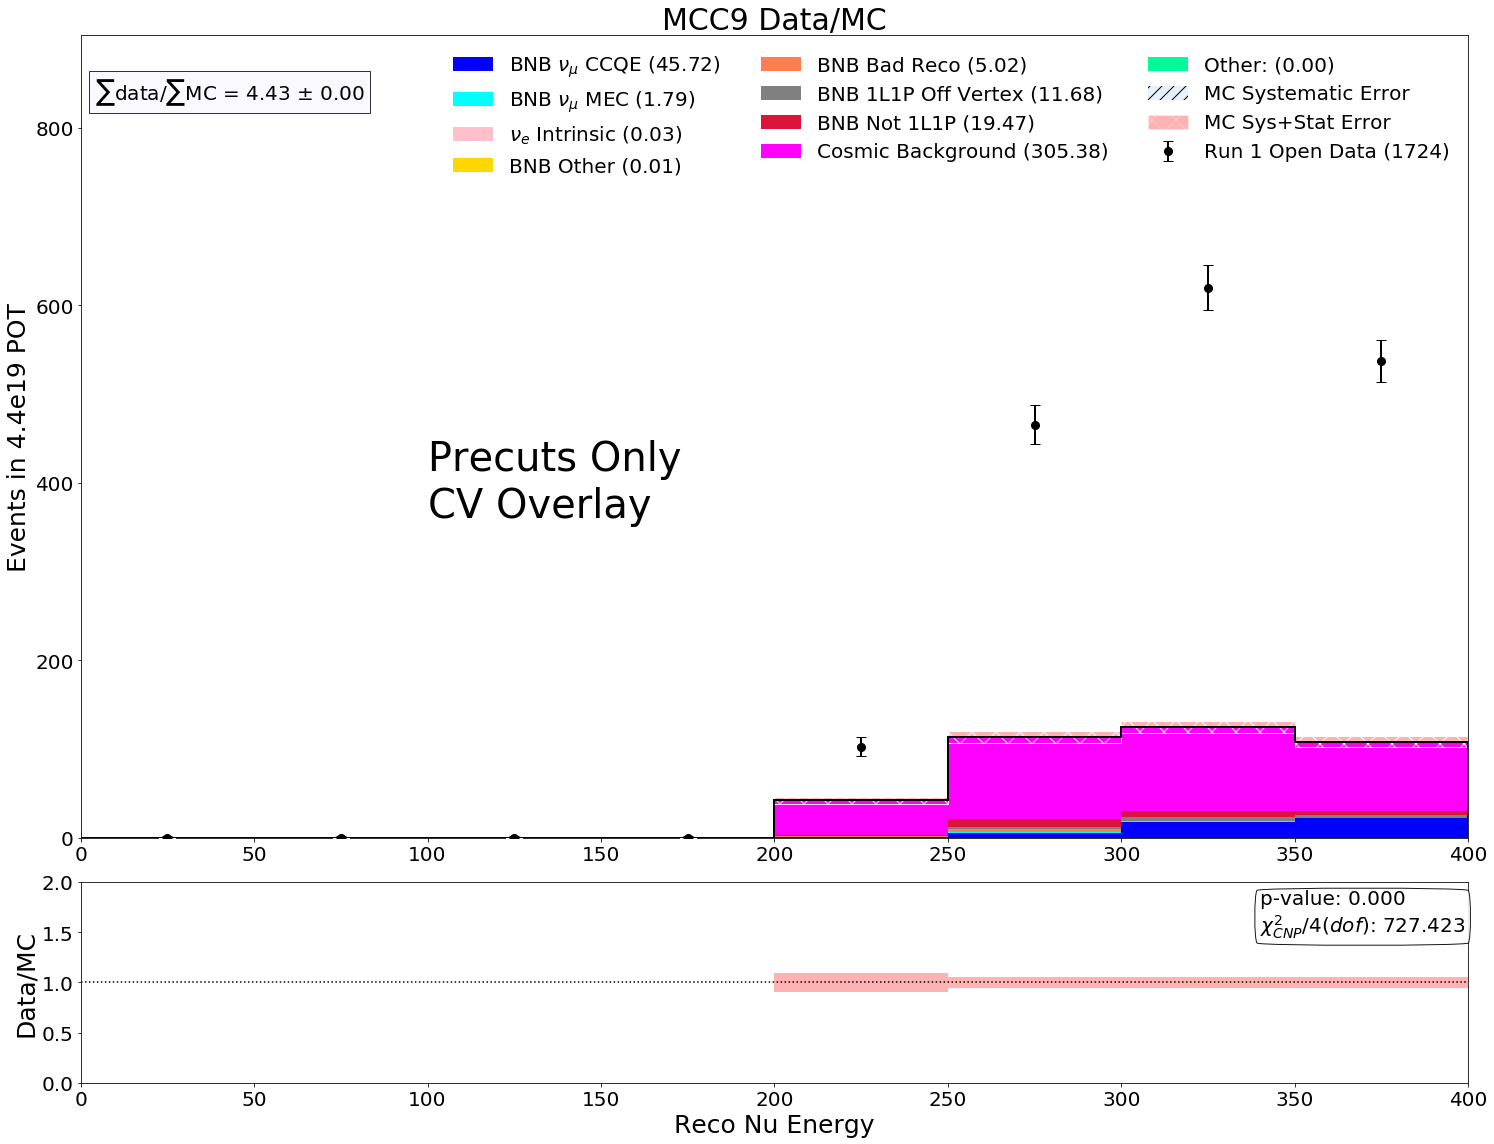

In [8]:
# distplot_wratio(string of variable name, number of bins, range, stacked histo list, data list, name for x-axis)
# for other arguments, see PlottingScripts.py

vartest = 'Enu_1m1p'
varname = 'Reco Nu Energy'
myrange = (0,400)
nbins = 8

fig,ax0,_,_ = distplot_wratio(vartest,nbins,myrange,run1HistsLowE,run1DataHist,varname,np.zeros((nbins,nbins)),normshift=.97,fs=(21,16))


#dvar = varListSel['Xreco']
#syscov = np.zeros((nbins,nbins))#np.genfromtxt(dvar.myscov,delimiter=',') + np.nan_to_num(cov.Polyfit([dvar],[nbins],True))
#fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,run1Hists,run1DataHist,syscov,fs=(22,13),consFac=.01)

#ax0.annotate(s_annotation,xy=(.75,.6), xycoords='axes fraction',fontsize=15)
ax0.annotate('Precuts Only\nCV Overlay',xy=(.25,.4), xycoords='axes fraction',fontsize=40)
#ax0.set_ylabel('Events in 1e19 POT',fontsize=25)

4355.077980237937


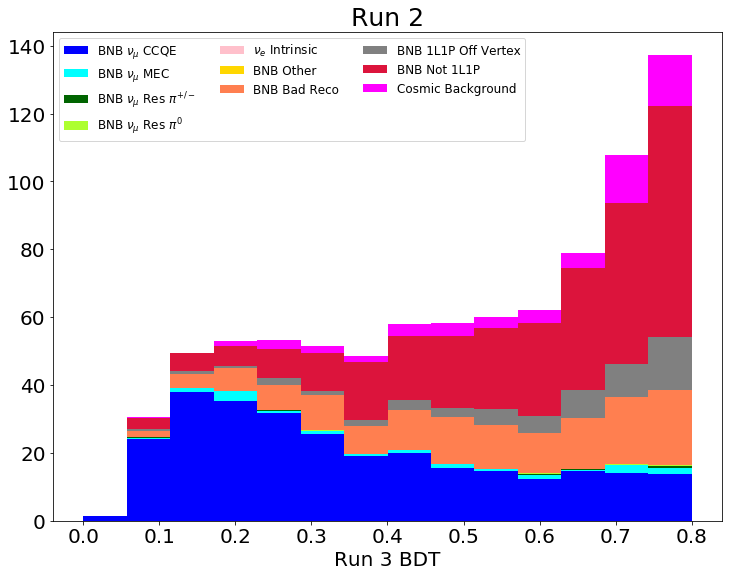

In [21]:
run3Hists.AddCut('bkgBDT_univ < .8')
run2Hists.AddCut('bkgBDT_univ < .8')

fig,ax = plt.subplots(figsize=(12,9))
a_vals_pred,a_wgt_pred,a_scale_pred,a_col,a_label = run3Hists.GetHists('bkgBDT_univ')
barf = plt.hist(a_vals_pred,bins=14,range=(0,.8),stacked=True,weights=a_wgt_pred*a_scale_pred,color=a_col,label=a_label)
# = plt.hist(a_vals_pred,bins=1,range=(0,.8),stacked=True,weights=a_scale_pred,color=a_col,label=a_label)
ax.legend(fontsize=12,ncol=3)

ax.set_xlabel('Run 3 BDT',fontsize=20)
ax.set_title('Run 2',fontsize=25)

print(np.asarray(barf[0]).sum())


# run2: 4770.41682230349
# run3: 4165.756348498825

Normalization Uncertainty: 0.0
2.485852040591333 0.007770012266413495
Data/MC
[       nan 0.88690262 0.75020426 1.13321995 1.2344058  1.52130412
 0.94124555 1.01286381 1.56616947 1.62151222]
[0.02       0.06       0.09999999 0.14       0.18       0.22
 0.26       0.3        0.34       0.38      ]


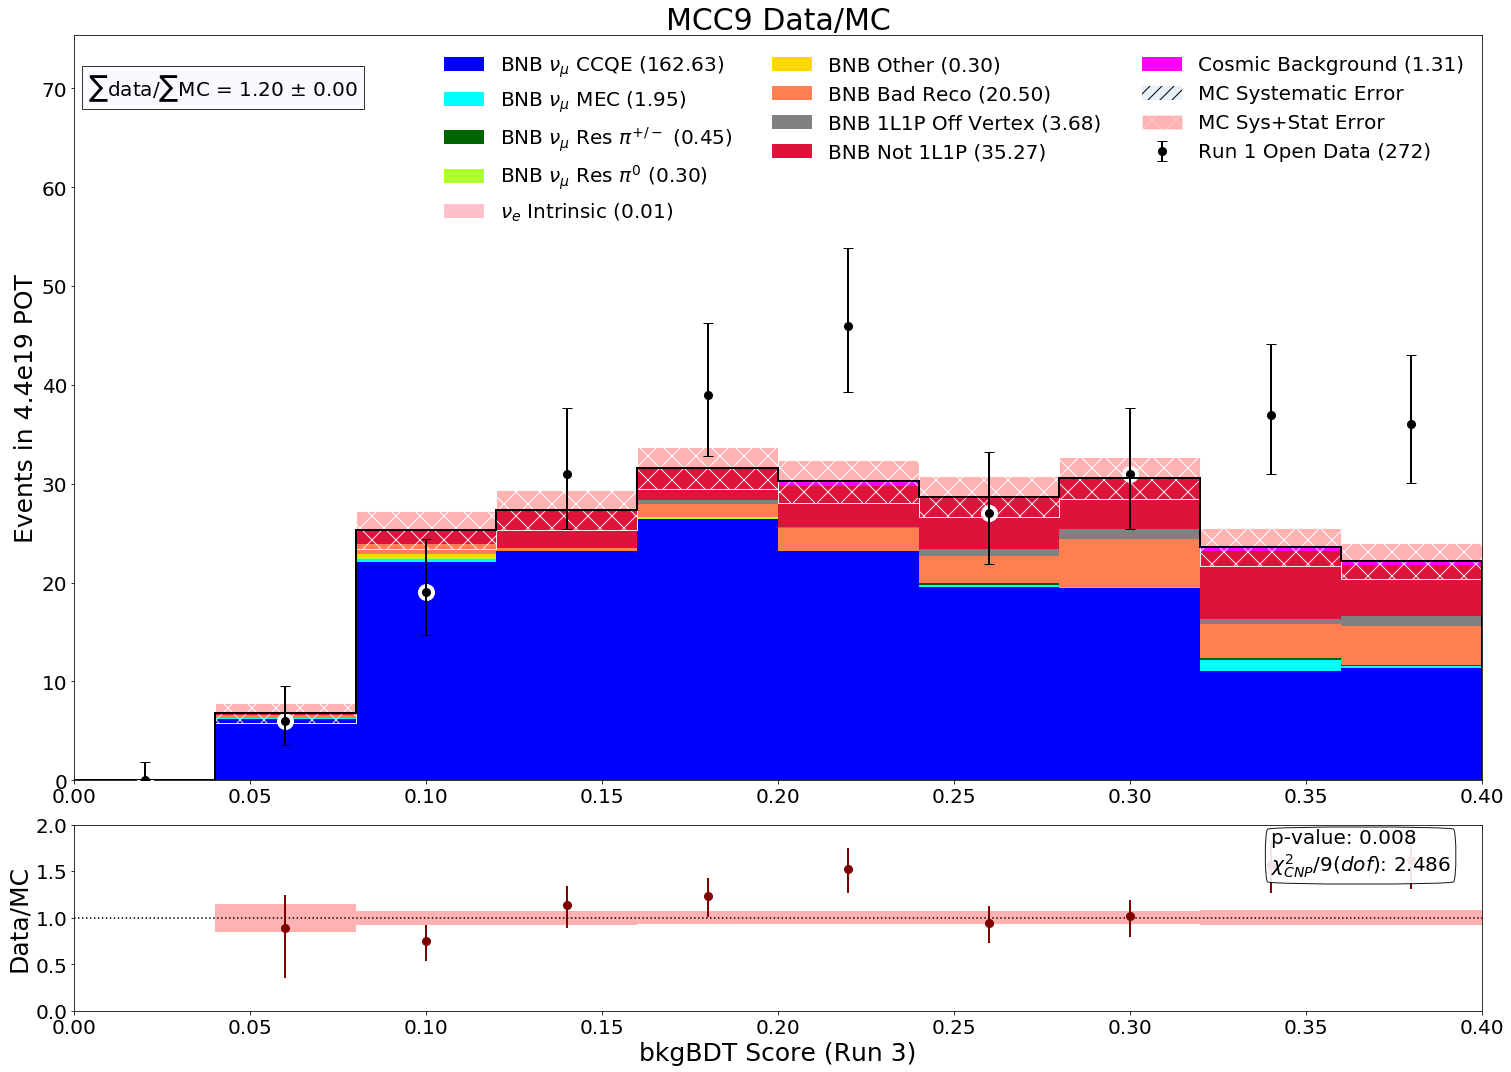

In [22]:
# distplot_wratio(string of variable name, number of bins, range, stacked histo list, data list, name for x-axis)
# for other arguments, see PlottingScripts.py

vartest = 'bkgBDT_univ'
varname = 'bkgBDT Score (Run 3)'
myrange = (0,.4)
nbins=10

#syscov = np.nan_to_num(cov.Polyfit([distVar('bkgBDT_run3',myrange)],[nbins],False))
syscov = np.zeros((nbins,nbins))

fig,ax0,_,_ = distplot_wratio(vartest,nbins,myrange,run1Hists,run1DataHist,varname,syscov,fs=(21,15))



#ax0.set_yscale('log')
#ax0.set_ylim(1,10e5)
#ax0.set_ylabel('Events in 1e19 POT',fontsize=25)
#ax0.set_ylabel('Events in 1.5e21 POT',fontsize=25)


#ax0.axvline(0.4)
#ax0.fill_between((.4,1),0,1e6,hatch='X',zorder=10,facecolor='none',edgecolor='lavender')
#d = ax0.legend(loc='upper right',fontsize=15,frameon=False,ncol=3)
#d.set_zorder(11)

# Apply cuts

In [8]:
bdtcuts = 'bkgBDT_univ < .4'
emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'

#s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts+ ' and not (InTraining==1)'#not (80 < Xreco < 92)'
s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts


s_ano_simple_w = wrap('BDT Cuts and '+s_cuts,28)
s_ano_simple = '' 
for ln in s_ano_simple_w:
    s_ano_simple += ln + '\n'

In [9]:
run1Hists.AddCut(s_cuts)
run2Hists.AddCut(s_cuts)
run3Hists.AddCut(s_cuts)
run1DataHist.AddCut(s_cuts)
run3DataHist.AddCut(s_cuts)
run1FilterTest.AddCut(s_cuts)
run2FilterTest.AddCut(s_cuts)
run3FilterTest.AddCut(s_cuts)

run1DataHist.AddCut(s_cuts)
run1DataHist_bqc.AddCut(s_cuts)

#run1HistsLowE.AddCut(s_cuts)
# run1FakedataHist_set1.AddCut(s_cuts)
# run3FakedataHist_set1.AddCut(s_cuts)
# run1FakedataHist_set2.AddCut(s_cuts)
# run3FakedataHist_set2.AddCut(s_cuts)
# run1FakedataHist_set3.AddCut(s_cuts)
# run3FakedataHist_set3.AddCut(s_cuts)

# run1FakedataHist_set4.AddCut(s_cuts)
# run3FakedataHist_set4.AddCut(s_cuts)
# run1FakedataHist_set5.AddCut(s_cuts)
# FakedataHist_set4.AddCut(s_cuts)
# mediumMC.AddCut(s_cuts)

bigData.AddCut(s_cuts)
bigMC.AddCut(s_cuts)

#bigFakeData.AddCut(s_cuts)
#bigFDMC.AddCut(s_cuts)


#errlabel = 'Flux Sys Only'

[0.15755352 0.13191882 0.08884214 0.06338423 0.05229043 0.04108157
 0.03138748 0.0248857  0.02066885 0.01776007 0.01334443 0.01202738
 0.0099932  0.00651282 0.00388597 0.00327091 0.00589507 0.01065855
 0.00967951 0.00849616]
[0.23817719 0.20330138 0.1334134  0.08998252 0.06937497 0.05200862
 0.03717676 0.02674985 0.02108858 0.01877407 0.01482585 0.01428439
 0.01334656 0.01054832 0.0066322  0.00524804 0.00677597 0.01069563
 0.00807435 0.00720309]
[0.488034   0.57199398 0.42462245 0.3457136  0.31138974 0.27166386
 0.2318461  0.20401243 0.18633161 0.18152165 0.16808905 0.16802528
 0.16563072 0.1575392  0.16477766 0.15140145 0.1538142  0.18395723
 0.17004269 0.18233029]
Normalization Uncertainty: 0.18388888014026372
mc stat error [       nan 0.25291372 0.08516643 0.06297713 0.05287097 0.04773476
 0.04060353 0.04030943 0.04460637 0.04231281 0.0482969  0.04918343
 0.05057011 0.05829334 0.05754482 0.06741769 0.09118636 0.09034838
 0.09040075 0.09557552]
data stat error CNP [       nan 0.30526

Text(0.53, 0.72, 'With Pi0 Weights')

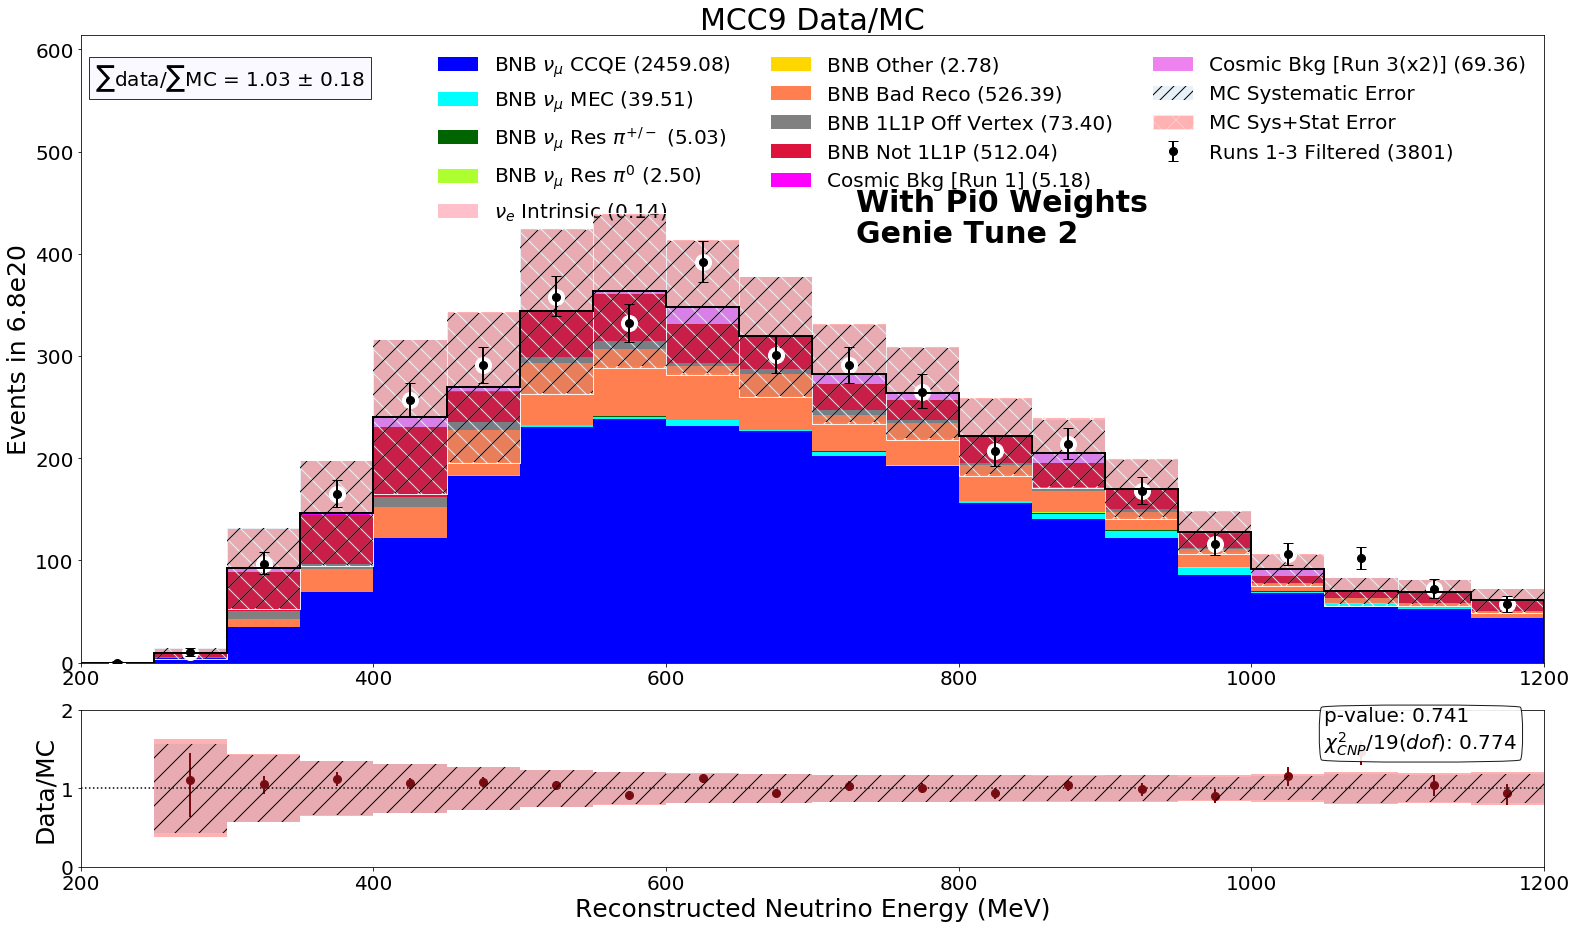

In [13]:
nbins = 20
dvar = varListSel['Enu_1m1p']

#try:

detsyscov_run1 = np.genfromtxt('/home/dcianci/Downloads/detsys_Enu_1m1p_run1_cov.csv',delimiter=',')
detsyscov_run3 = np.genfromtxt('/home/dcianci/Downloads/detsys_Enu_1m1p_run3_cov.csv',delimiter=',')

detsyscov = detsyscov_run1*(RUN1_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)) + detsyscov_run3*((RUN2_FILTER_POT+RUN3_FILTER_POT)/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))

syscov =  np.nan_to_num(np.genfromtxt(dvar.myscov,delimiter=',')) + detsyscov

print(detsyscov_run1.diagonal())


print(detsyscov.diagonal())

print(np.sqrt(syscov.diagonal()))


#+ np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
#except:
#    syscov = np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
    
    
#fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,run1Hists,run1FilterTest,syscov,fs=(22,13),consFac=.01)

fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(22,13))#,consFac=.01)

ax0.set_ylabel('Events in 6.8e20',fontsize=25)
#ax0.set_ylabel('Events in 2.6e20 POT',fontsize=25)

#ax0.annotate('DetSys Error Incomplete',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
ax0.annotate('Genie Tune 2',xy=(.53,.67), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
ax0.annotate('With Pi0 Weights',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')

#ax0.annotate('CONTAINS TRAINING SAMPLE',xy=(.53,.57), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('Nominal Cov Matrix',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('Without Training Sample',xy=(.7,.5), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')

In [ ]:
nbins = 14
dvar = varListSel['bkgBDT_univ']

#try:
#syscov =  np.nan_to_num(np.genfromtxt(dvar.myscov,delimiter=','))# + np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
syscov =  np.nan_to_num(np.genfromtxt('../../data/CovMatrices_Nov17/frac_covar_sel_run1__bdt_score.txt',delimiter=','))# + np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
#except:
#    syscov = np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
    
    
fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,run1Hists,run1FilterTest,syscov,fs=(22,13),consFac=.01)
#fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(22,13),consFac=.01)

#ax0.set_ylabel('Events in 6.8e20',fontsize=25)
ax0.set_ylabel('Events in 1.7e20 POT',fontsize=25)

ax0.annotate('DetSys Error Incomplete',xy=(.27,.22), xycoords='axes fraction',fontsize=30,color='white',weight = 'bold')
ax0.annotate('Genie Tune 2',xy=(.27,.17), xycoords='axes fraction',fontsize=30,color='white',weight = 'bold')

Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (3.56)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (3.05)', '$\\nu_e$ Intrinsic (0.07)', 'BNB Other (1.02)']
Normalization Uncertainty: 0.0
7.5545227483020385 4.191615137205673e-07


Text(0.53, 0.72, 'PROBLEM X REGION')

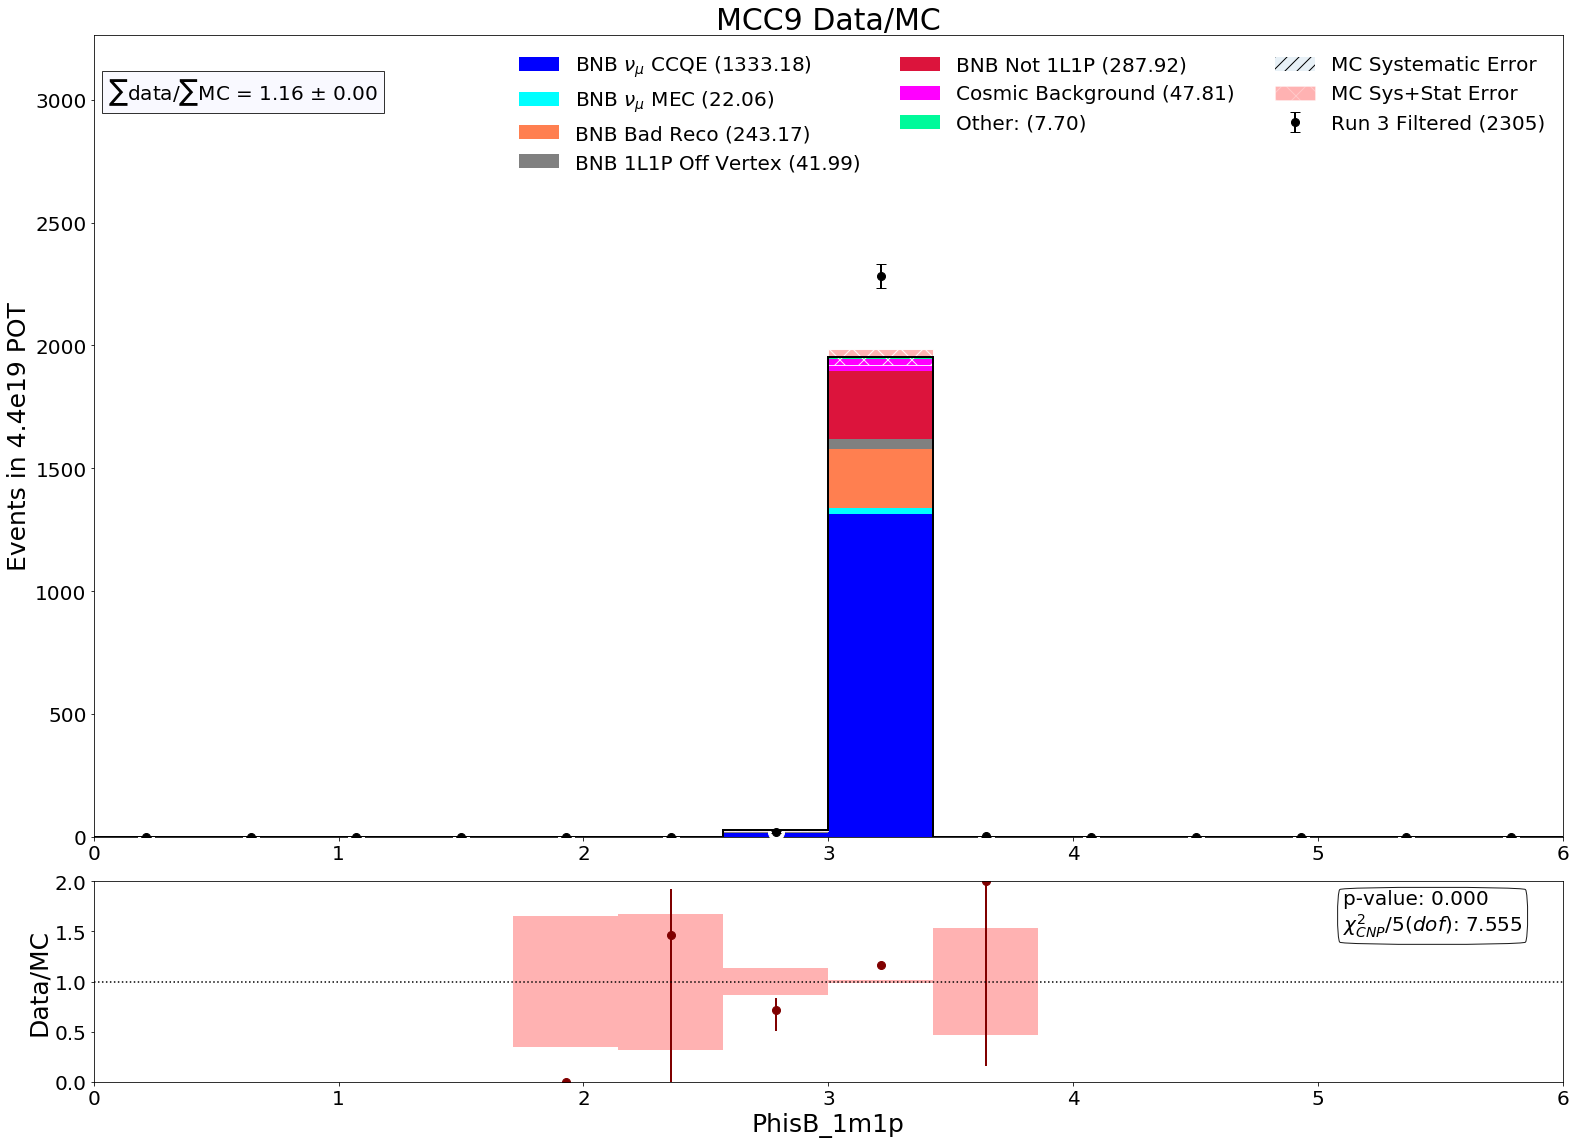

In [78]:

#distplot_wratio('MC_energyInit',20,(0,2000),run1Hists,run1DataHist,'True Nu Energy',np.zeros((20,20)),fs=(22,16),consFac=.01)
nbins = 14
nrange = (0,6)
s_var = 'PhisB_1m1p'
#distplot_wratio('Xreco',nbins,nrange,run3Hists,run2FilterTest,'',np.zeros((nbins,nbins)),fs=(22,16),consFac=.01)

distplot_wratio(s_var,nbins,nrange,run3Hists,run3FilterTest,s_var,np.zeros((nbins,nbins)),fs=(22,16),consFac=.01)


ax0.set_ylabel('Events in Data Set',fontsize=25)
ax0.annotate('PROBLEM X REGION',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')


#ax0.annotate('MicroBooNE Preliminary',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('Nominal Cov Matrix',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('TEMPORARY PLACEHOLDER',xy=(.4,.5), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')

In [80]:
# This guy will just dump a bunch of plots for you

!!

nbins = 14
dumphole = 'debug_bigdata_notraining'     # where do you want these plots to go?
myMCStack = bigMC                                   # your MC
myDataHist = bigData                                 # your data
s_yaxis = 'Events in 6.8e20 POT'                     # y axis label

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

a_pval = []
a_varname = []
    
for x,dist in varListSel.items():
    print(dist.myname)
    try:
        syscov = np.genfromtxt(dist.myscov,delimiter=',') + np.nan_to_num(cov.Polyfit([dist],[nbins]))
        fig,ax0,ax1,pval = distplot_wratio(dist.myname,nbins,dist.myrange,myMCStack,myDataHist,dist.mylabel,syscov,fs=(21,13),consFac=.01)
        a_varname.append(dist.myname)
    except:
        print('Oops, no flux+xsec matrix found for ',dist.myname)
        syscov = np.nan_to_num(cov.Polyfit([dist],[nbins]))
        fig,ax0,ax1,pval = distplot_wratio_dvar(varListSel[dist.myname],nbins,myMCStack,myDataHist,syscov,fs=(21,13),consFac=.01)
        ax0.annotate('No Flux+XSec Systematics',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
    
    ax0.set_ylabel(s_yaxis,fontsize=20)
    ax0.annotate('MicroBooNE Preliminary',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

Xreco
wiremodX 1m1p Polyfit Degrees: 0 8.26139243443807
wiremodYZ 1m1p Polyfit Degrees: 0 8.300151666005453
wiremoddEdx 1m1p Polyfit Degrees: 0 6.836298783620198
LYdown 1m1p Polyfit Degrees: 0 5.249008735020955
LYdownRayleigh 1m1p Polyfit Degrees: 0 3.904093941052755
SCE 1m1p Polyfit Degrees: 0 9.659433682759603
wiremodThetaYZ 1m1p Polyfit Degrees: 0 6.300984223683675
wiremodThetaXZ 1m1p Polyfit Degrees: 0 10.085695107777914
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.12613517254087758
2.448175394273425 0.001880196342783802
Yreco
wiremodX 1m1p Polyfit Degrees: 0 11.120586713155111
wiremodYZ 1m1p Polyfit Degrees: 0 8.554850419362387
wiremoddEdx 1m1p Polyfit Degrees: 0 8.585004647572836
LYdown 1m1p Polyfit Degrees: 0 8.588611920674643
LYdownRayleigh 1m1p Polyfit Degrees: 0 5.584718306859334
SCE 1m1p Polyfit Degrees: 0 15.805862744649252
wiremodThetaYZ 1m1p Polyfit Degrees: 0 9.16

/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/DetSysScripts.py:246: RuntimeWarning: invalid value encountered in sqrt
  yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*h0),h0,out=np.zeros_like(bincenters),where=h0!=0)


Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.12215912334381873
1.2405374399069427 0.237120957549399
ChargeNearTrunk
wiremodX 1m1p Polyfit Degrees: 0 21.143208821614582
wiremodYZ 1m1p Polyfit Degrees: 0 10.611131032307943
wiremoddEdx 1m1p Polyfit Degrees: 0 13.484539349873861
LYdown 1m1p Polyfit Degrees: 0 16.2240727742513
LYdownRayleigh 1m1p Polyfit Degrees: 0 8.89481814702352
SCE 1m1p Polyfit Degrees: 0 26.61212666829427
wiremodThetaYZ 1m1p Polyfit Degrees: 0 179.26976521809897
wiremodThetaXZ 1m1p Polyfit Degrees: 0 51.88366826375326
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.24074746085516005
1.946240281285915 0.01787599797536299
Enu_1m1p
wiremodX 1m1p Polyfit Degrees: 0 11.53161652882894
wiremodYZ 1m1p Polyfit Degrees: 0 10.869021733601889
wiremoddEdx 1m1p Polyfit De

Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (33.12)', '$\\nu_e$ Intrinsic (0.13)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.13362319122419644
1.0912503031747083 0.3594518410031673
Lepton_PhiReco
wiremodX 1m1p Polyfit Degrees: 0 13.018007596333822
wiremodYZ 1m1p Polyfit Degrees: 0 8.90793546040853
wiremoddEdx 1m1p Polyfit Degrees: 0 10.154798825581869
LYdown 1m1p Polyfit Degrees: 0 3.7209418614705405
LYdownRayleigh 1m1p Polyfit Degrees: 0 4.206531365712483
SCE 1m1p Polyfit Degrees: 0 10.368886311848959
wiremodThetaYZ 1m1p Polyfit Degrees: 0 12.225415547688803
wiremodThetaXZ 1m1p Polyfit Degrees: 0 11.816463788350424
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.1434088700232276
0.8329020015942173 0.6335361821848275
Lepton_ThetaReco
wiremodX 1m1p Polyfit Degrees: 0 10.210598786671957
wiremodYZ 1m1p Polyfit Degrees: 0 11.198211034138998
wiremoddEdx 1m1p

Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.2059841987720845
2.652925120245331 0.0007023473975118488
MPID_gamma
wiremodX 1m1p Polyfit Degrees: 1 20.539728514157595
wiremodYZ 1m1p Polyfit Degrees: 2 26.728978329592206
wiremoddEdx 1m1p Polyfit Degrees: 2 17.592211912786837
LYdown 1m1p Polyfit Degrees: 0 9.64401193706752
LYdownRayleigh 1m1p Polyfit Degrees: 1 7.434772362462728
SCE 1m1p Polyfit Degrees: 0 12.902700726474356
wiremodThetaYZ 1m1p Polyfit Degrees: 2 16.39781980404682
wiremodThetaXZ 1m1p Polyfit Degrees: 2 15.53576057958752
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{0}$ (35.71)', '$\\nu_e$ Intrinsic (0.14)', 'Cosmic Bkg [Run 1] (4.90)']
Normalization Uncertainty: 0.19240764915872244
2.583054691194756 0.0009864556164763671
MPID_pion
wiremodX 1m1p Polyfit Degrees: 0 11.631057143338722
wiremodYZ 1m1p Polyfit Degrees: 0 17.55447360709147
wiremoddEdx 1m1p Polyfit D

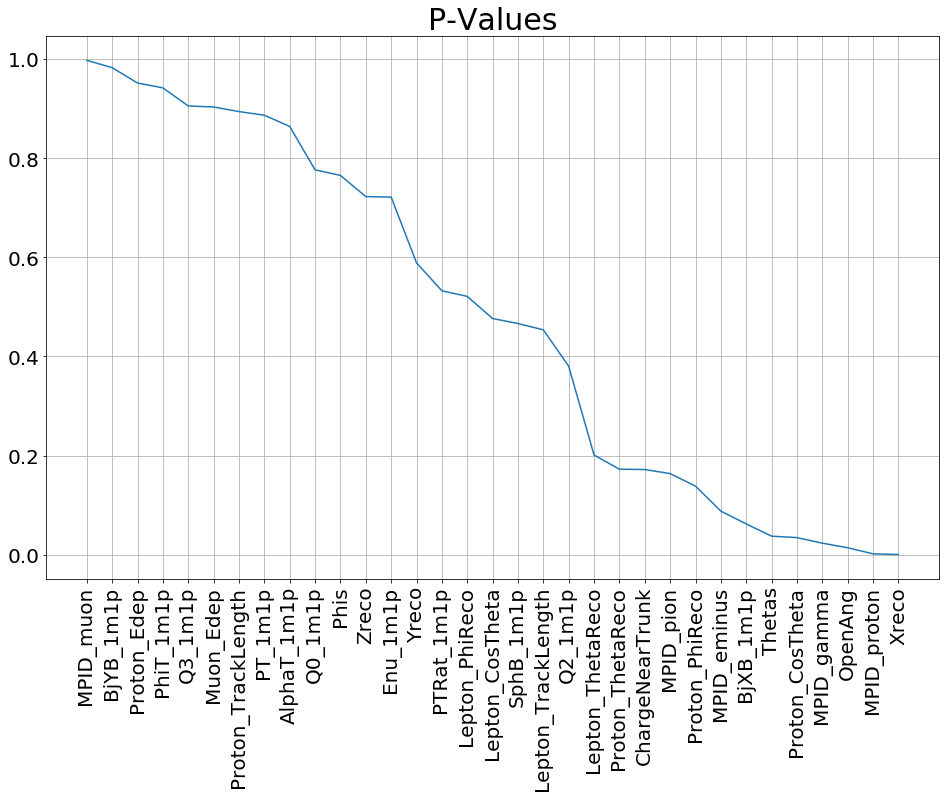

In [21]:
#scalesort = gh_scale[i].argsort()
#        sorted_vals = gh_vals[i][scalesort[::-1]]

a_pval.append(.722)
a_varname.append('Enu_1m1p')

psort = np.array(a_pval).argsort()
sorted_pval = np.array(a_pval)[psort[::-1]]
sorted_varname = np.array(a_varname)[psort[::-1]]
    
fig,ax = plt.subplots(figsize=(16,10))
ax.set_title('P-Values',fontsize=30)
plt.plot(range(len(sorted_pval)), sorted_pval)
plt.xticks(range(len(varListSel)),sorted_varname, rotation='vertical',fontsize=20)
plt.grid(True)
plt.savefig(dumphole+'/pvals.png')

## Cool BDT Score vs Purity/Efficiency Plot

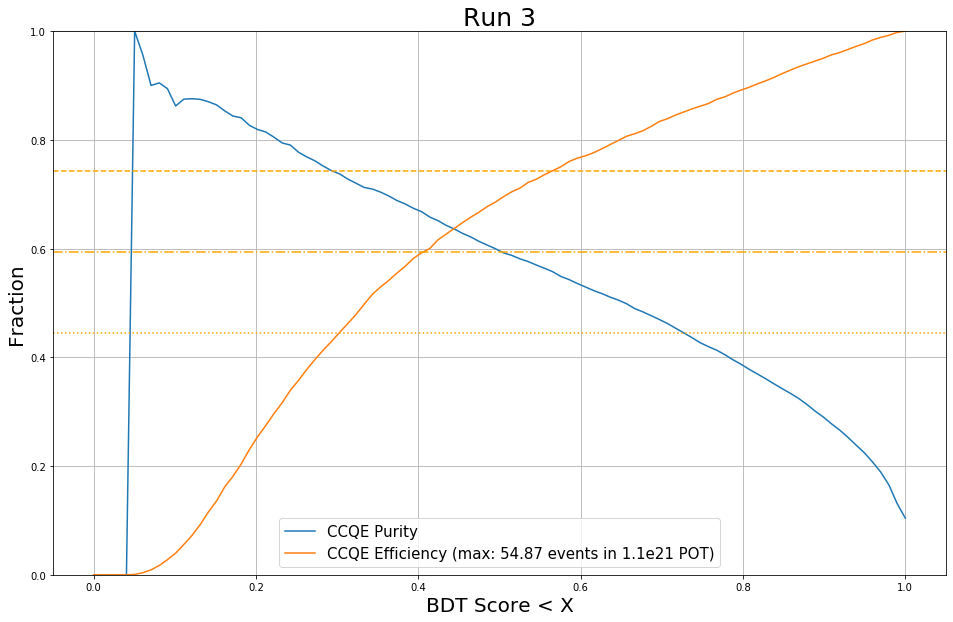

In [23]:
# Okay, let's do this way less sloppy.
s_defaultcut = s_cuts#+ ' and ' + bdtcuts_run23
s_testcut_template = s_defaultcut+' and bkgBDT_univ < %f'
#s_testcut_template = s_defaultcut+' and (MPID_proton > %f or MPID_proton == 0) and (MPID_muon > %f or MPID_muon==0)'

myrange = (0,1)
mydx = 100
a_cutspace = np.linspace(myrange[0],myrange[1],mydx)

run3Hists.AddCut(s_defaultcut)
hp_vals,_,_,hp_wgts,hp_scale = run3Hists.GetHists('Enu_1m1p')
hCCQE,_ = np.histogram(hp_vals[0],1,range=(300,1000),weights=hp_wgts[0]*hp_scale[0])
nevts_ccqe_max = hCCQE.sum()
    
frac_purity = []
frac_efficiency = []


for i in range(mydx):
    s_testcut = s_testcut_template%(a_cutspace[i])
    
    run3Hists.AddCut(s_testcut)
    hp_vals,_,_,hp_wgts,hp_scale = run3Hists.GetHists('Enu_1m1p')  # histpack: a_vals,a_cols,a_labels,a_wgts,a_scale
    nevts_mc_normed = 0
    for j in range(len(hp_vals)):
        h1,_ = np.histogram(hp_vals[j],1,range=(300,1000),weights=hp_wgts[j]*hp_scale[j])
        nevts_mc_normed += h1.sum()
    hCCQE,_ = np.histogram(hp_vals[0],1,range=(300,1000),weights=hp_wgts[0]*hp_scale[0])
    nevts_ccqe_normed = hCCQE.sum()
    
    if(nevts_mc_normed != 0):
        frac_purity.append(nevts_ccqe_normed/float(nevts_mc_normed))
    else:
        frac_purity.append(0)
    
    frac_efficiency.append(nevts_ccqe_normed/float(nevts_ccqe_max))
    
fig,ax = plt.subplots(figsize=(16,10))
#ax.set_title('P',fontsize=30)
plt.plot(a_cutspace,frac_purity,label='CCQE Purity')
plt.plot(a_cutspace,frac_efficiency,label='CCQE Efficiency (max: %.2f events in 1.1e21 POT)'%nevts_ccqe_max)

ax.legend(fontsize=15)
plt.grid(True)
ax.set_title('Run 3',fontsize=25)
ax.set_xlabel('BDT Score < X',fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_ylim((0,1))


ax.axhline(3000/float(6734),color='orange',linestyle=':')
ax.axhline(4000/float(6734),color='orange',linestyle='-.')
ax.axhline(5000/float(6734),color='orange',linestyle='--')


# Print everything to CSVs for whoever wants it

In [14]:
bdtcuts = 'bkgBDT_univ < .4'
emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'

s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts

tag = 'jan29_forRan_finalsel'

print("df_numu_run1_presel:",len(df_numu_run1_presel.query(s_cuts)))
#print("df_numu_run1_presel_lowe:",len(df_numu_run1_presel_lowe.query(s_cuts)))
print("df_numu_run3_presel:",len(df_numu_run3_presel.query(s_cuts)))
#print("df_numu_run3_presel_lowe:",len(df_numu_run3_presel_lowe.query(s_cuts)))
print("df_nue_run1_presel:",len(df_nue_run1_presel.query(s_cuts)))
print("df_nue_run3_presel:",len(df_nue_run3_presel.query(s_cuts)))
print("df_ext_run1_presel:",len(df_ext_run1_presel.query(s_cuts)))
print("df_ext_run3_presel:",len(df_ext_run3_presel.query(s_cuts)))

print("df_data_run1:",len(df_data_run1_filter_presel.query(s_cuts)))

RSEVE = ['run','subrun','event','vtxid','Enu_1m1p','MC_energyInit']

selvars = ['run','subrun','event','MC_energyInit','CVIndex','Xreco','Yreco','Zreco','OpenAng','Thetas','Phis','ChargeNearTrunk','Enu_1m1p','PhiT_1m1p','AlphaT_1m1p','PT_1m1p','PTRat_1m1p','BjXB_1m1p','BjYB_1m1p','Q2_1m1p','SphB_1m1p','Q0_1m1p','Q3_1m1p','Lepton_PhiReco','Lepton_ThetaReco','Lepton_TrackLength','Muon_Edep','Lepton_CosTheta','Proton_PhiReco','Proton_ThetaReco','Proton_TrackLength','Proton_Edep','Proton_CosTheta','MPID_eminus','MPID_muon','MPID_proton','MPID_gamma','MPID_pion','bkgBDT_univ']

selvars = ['run','subrun','event','Enu_1m1p']#,'MC_energyInit']

#print('run1 has pions in %.3f of events'%(len(df_numu_run1_presel.query(s_cuts).query('haspi0 == 1'))/float(len(df_numu_run1_presel.query(s_cuts)))))
#print('run2 has pions in %.3f of events'%(len(df_numu_run2_presel.query(s_cuts).query('haspi0 == 1'))/float(len(df_numu_run2_presel.query(s_cuts)))))
#print('run3 has pions in %.3f of events'%(len(df_numu_run3_presel.query(s_cuts).query('haspi0 == 1'))/float(len(df_numu_run3_presel.query(s_cuts)))))

printvars = selvars#['run','subrun','event','xsec_corr_weight','MC_energyInit','Xreco','Yreco','Zreco','MC_parentSCEX','MC_parentSCEY','MC_parentSCEZ','OpenAng','Thetas','Phis','ChargeNearTrunk','Enu_1m1p','PhiT_1m1p','AlphaT_1m1p','PT_1m1p','PTRat_1m1p','BjXB_1m1p','BjYB_1m1p','Q2_1m1p','SphB_1m1p','Q0_1m1p','Q3_1m1p','Lepton_PhiReco','Lepton_ThetaReco','Lepton_TrackLength','Muon_Edep','Lepton_CosTheta','Proton_PhiReco','Proton_ThetaReco','Proton_TrackLength','Proton_Edep','Proton_CosTheta','bkgBDT_univ']
df_data_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run1_5e19_%s.csv'%tag,index=False,header=False)




#printvars = ['Enu_1m1p']

# df_numu_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/numu_run1_%s.csv'%tag)
# df_numu_run2_presel.query(s_cuts)[printvars].to_csv('~/Downloads/numu_run2_%s.csv'%tag)
# #df_numu_run1_presel_lowe.query(s_cuts)[printvars].to_csv('~/Downloads/numu_run1_lowE_%s.csv'%tag)
#df_numu_run3_presel.query(s_cuts)[printvars].to_csv('~/Downloads/numu_run3_%s.csv'%tag,index=False,header=False)
#df_numu_run3_presel_lowe.query(s_cuts)[printvars].to_csv('~/Downloads/numu_run3_lowE_%s.csv'%tag)

# df_nue_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/nue_run1_%s.csv'%tag)
# df_nue_run2_presel.query(s_cuts)[printvars].to_csv('~/Downloads/nue_run2_%s.csv'%tag)
# df_nue_run3_presel.query(s_cuts)[printvars].to_csv('~/Downloads/nue_run3_%s.csv'%tag)

# printvars = ['run','subrun','event','Xreco','Yreco','Zreco','OpenAng','Thetas','Phis','ChargeNearTrunk','Enu_1m1p','PhiT_1m1p','AlphaT_1m1p','PT_1m1p','PTRat_1m1p','BjXB_1m1p','BjYB_1m1p','Q2_1m1p','SphB_1m1p','Q0_1m1p','Q3_1m1p','Lepton_PhiReco','Lepton_ThetaReco','Lepton_TrackLength','Muon_Edep','Lepton_CosTheta','Proton_PhiReco','Proton_ThetaReco','Proton_TrackLength','Proton_Edep','Proton_CosTheta','bkgBDT_univ']

# df_ext_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/ext_run1_%s.csv'%tag)
# df_ext_run3_presel.query(s_cuts)[printvars].to_csv('~/Downloads/ext_run3_%s.csv'%tag)

#df_data_run1_filter_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run1_filter_%s.csv'%tag,index=False,header=False)
#df_data_run2_filter_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run2_filter_%s.csv'%tag,index=False,header=False)
#df_data_run3_filter_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run3_filter_%s.csv'%tag,index=False,header=False)

# df_fakedata_set1_run1_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set1_run1_%s.csv'%tag)
# df_fakedata_set1_run3b_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set1_run3_%s.csv'%tag)

# df_fakedata_set2_run1_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set2_run1_%s.csv'%tag)
# df_fakedata_set2_run3b_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set2_run3_%s.csv'%tag)

# df_fakedata_set4_run1_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set4_run1_%s.csv'%tag)
# df_fakedata_set4_run3b_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set4_run3_%s.csv'%tag)

# df_fakedata_set5_run1_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_set5_run1_%s.csv'%tag)


df_numu_run1_presel: 1251
df_numu_run3_presel: 2531
df_nue_run1_presel: 171
df_nue_run3_presel: 61
df_ext_run1_presel: 3
df_ext_run3_presel: 21
df_data_run1: 1017


In [47]:
# print ntuples for an oscillation study
#df_data_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run1_5e19_%s.csv'%tag,index=False,header=False)
df_numu_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUMU_RUN1_POT)
df_numu_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUMU_RUN2_POT)
df_numu_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUMU_RUN3_POT)
df_nue_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUE_RUN1_POT)
df_nue_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUE_RUN2_POT)
df_nue_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUE_RUN3_POT)

df_mc = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel)).query(s_cuts)
df_mc['fullwgt'] = Pi0Wgt(df_mc)


printvars = ['Enu_1m1p','MC_energyInit','nu_L_true','potscale','fullwgt']
df_mc[printvars].to_csv('/home/dcianci/Downloads/microboone_mc_feb16.txt',index=False,header=False,sep='\t')

printvarsdata = ['Enu_1m1p']
df_data = pd.concat((df_data_run1_filter_presel,df_data_run2_filter_presel,df_data_run3_filter_presel)).query(s_cuts)


df_ext_run1_presel['potscale'] = RUN1_FILTER_POT/float(EXTRUN1_POT)
df_ext_run3_presel['potscale'] = (RUN2_FILTER_POT+RUN3_FILTER_POT)/float(EXTRUN3_POT)

df_bkg = pd.concat((df_ext_run1_presel,df_ext_run3_presel)).query(s_cuts)

data_vals,binedges = np.histogram(df_data['Enu_1m1p'],range=(200,1200),bins=20)
np.savetxt("/home/dcianci/Downloads/microboone_data_histo_feb16.txt", data_vals, delimiter=" ")
np.savetxt("/home/dcianci/Downloads/microboone_binedges_feb16.txt", binedges, delimiter=" ")

bkg_vals,_ = np.histogram(df_bkg['Enu_1m1p'],range=(200,1200),bins=20,weights=df_bkg['potscale'])
np.savetxt("/home/dcianci/Downloads/microboone_bkg_histo_feb16.txt",bkg_vals,delimiter=" ")


detsyscov_run1 = np.genfromtxt('/home/dcianci/Downloads/detsys_Enu_1m1p_run1_cov.csv',delimiter=',')
detsyscov_run3 = np.genfromtxt('/home/dcianci/Downloads/detsys_Enu_1m1p_run3_cov.csv',delimiter=',')
detsyscov = detsyscov_run1*(RUN1_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)) + detsyscov_run3*((RUN2_FILTER_POT+RUN3_FILTER_POT)/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))
syscov =  np.nan_to_num(np.genfromtxt(varListSel['Enu_1m1p'].myscov,delimiter=',')) + detsyscov
np.savetxt("/home/dcianci/Downloads/microboone_fracsysmatrix_feb16.txt",syscov,delimiter=' ')

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


# Experimental Zone
nothing below this point should be trusted without scrutiny

Xreco
Yreco
Zreco
OpenAng
Thetas
Phis
ChargeNearTrunk
Enu_1m1p
PhiT_1m1p
AlphaT_1m1p
PT_1m1p
PTRat_1m1p
BjXB_1m1p
BjYB_1m1p
Q2_1m1p
SphB_1m1p
Q0_1m1p
Q3_1m1p
Lepton_PhiReco
Lepton_ThetaReco
Lepton_TrackLength
Muon_Edep
Proton_PhiReco
Proton_ThetaReco
Proton_TrackLength
Proton_Edep
Proton_CosTheta
Lepton_CosTheta
MPID_eminus
MPID_muon
MPID_proton
MPID_gamma
MPID_pion


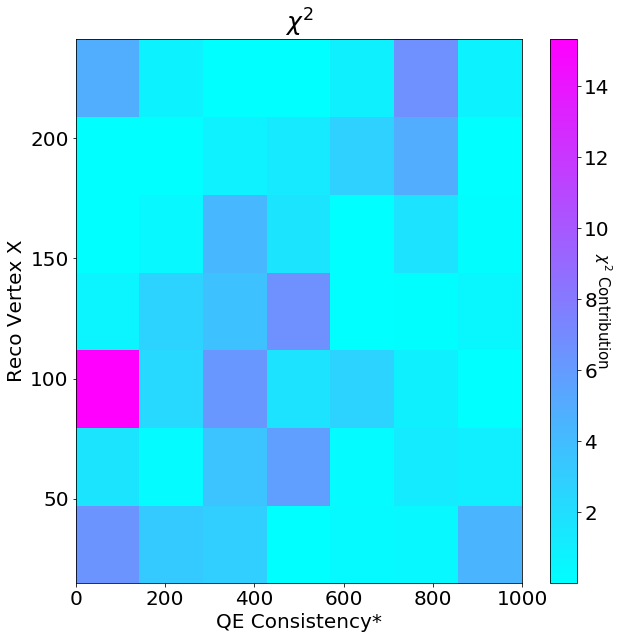

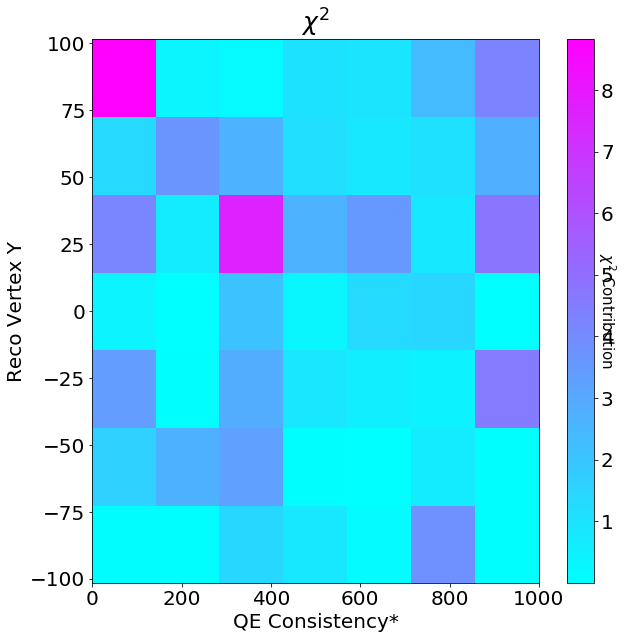

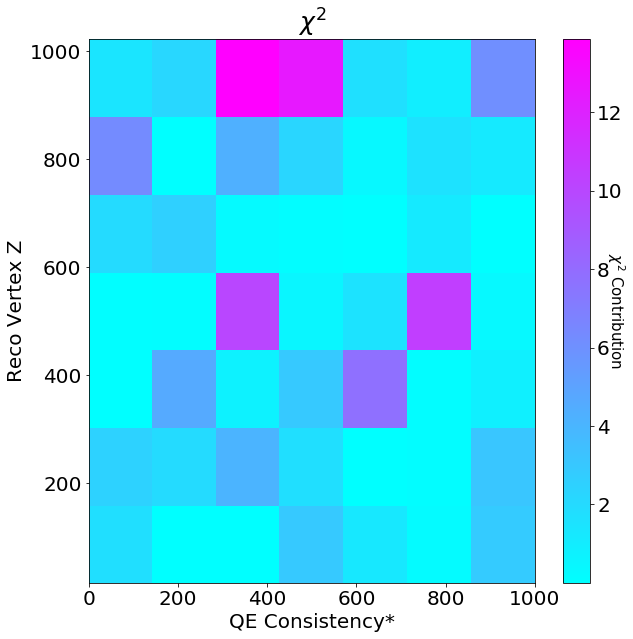

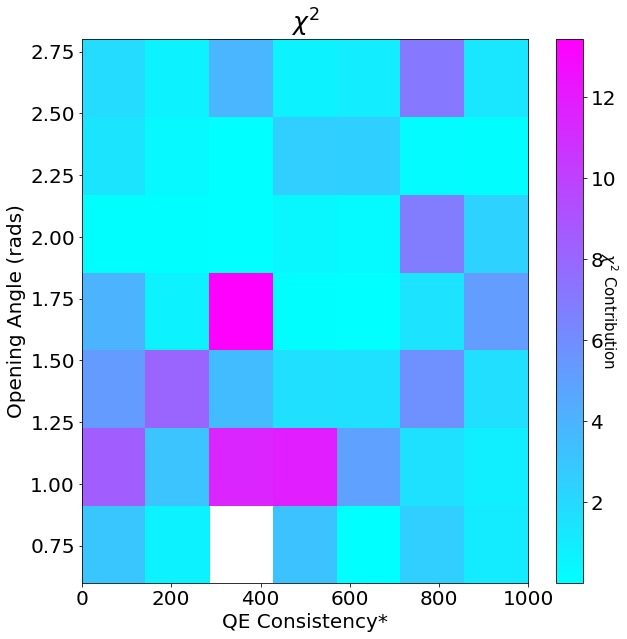

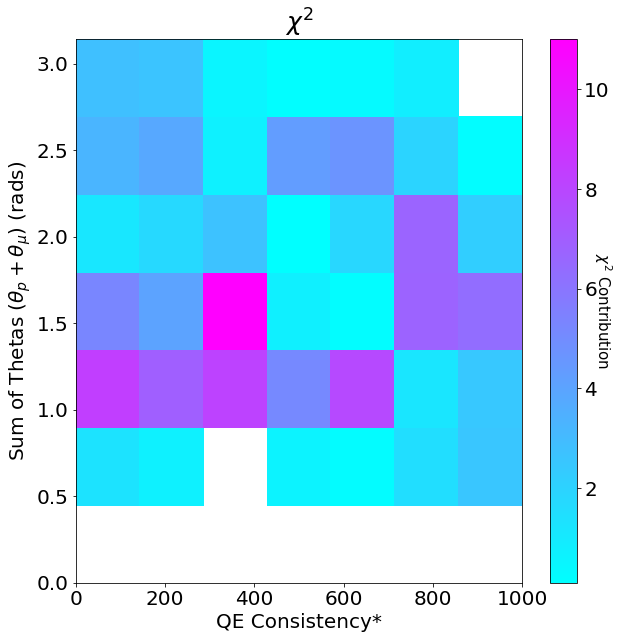

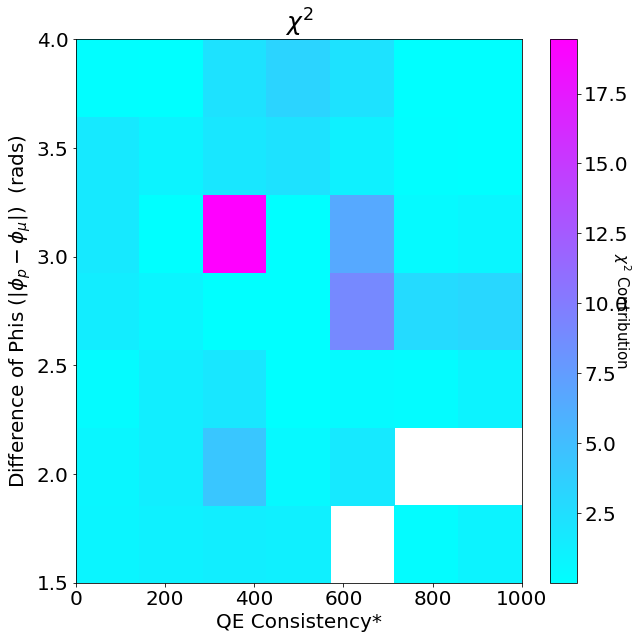

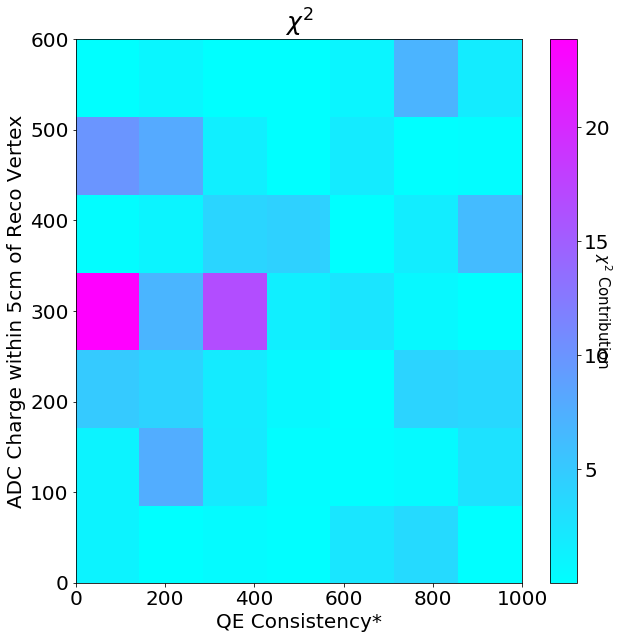

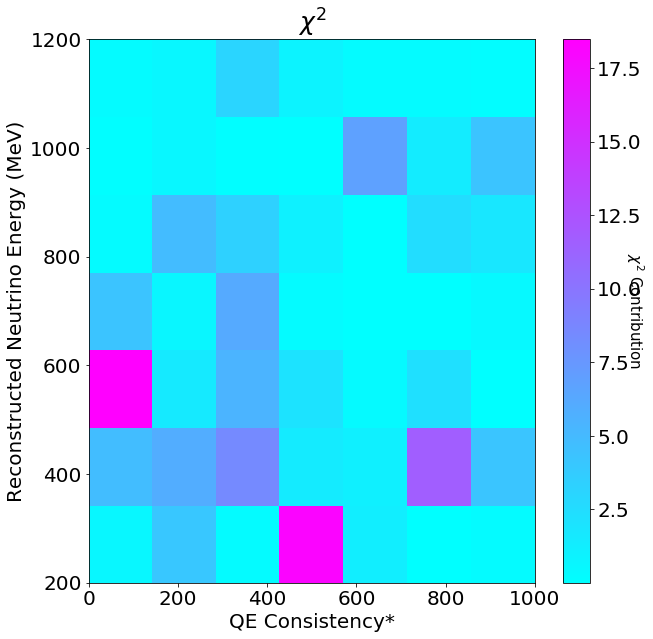

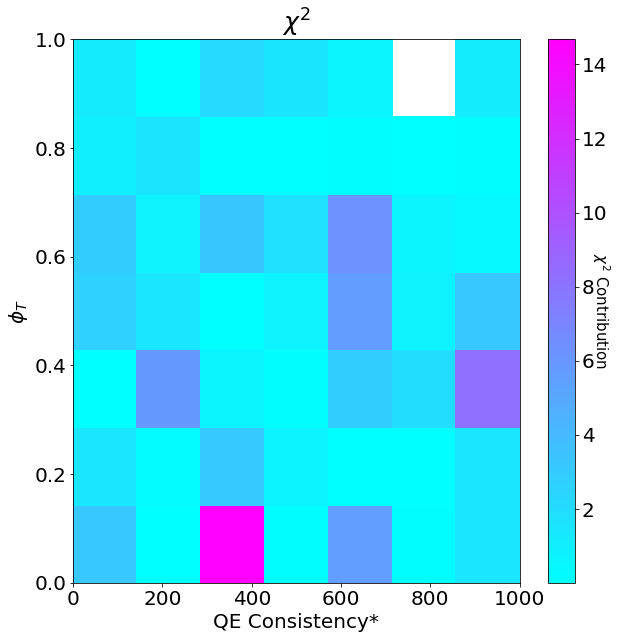

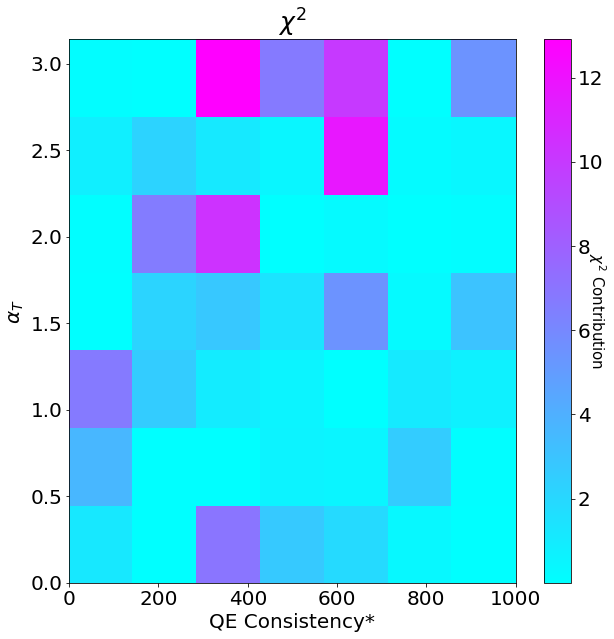

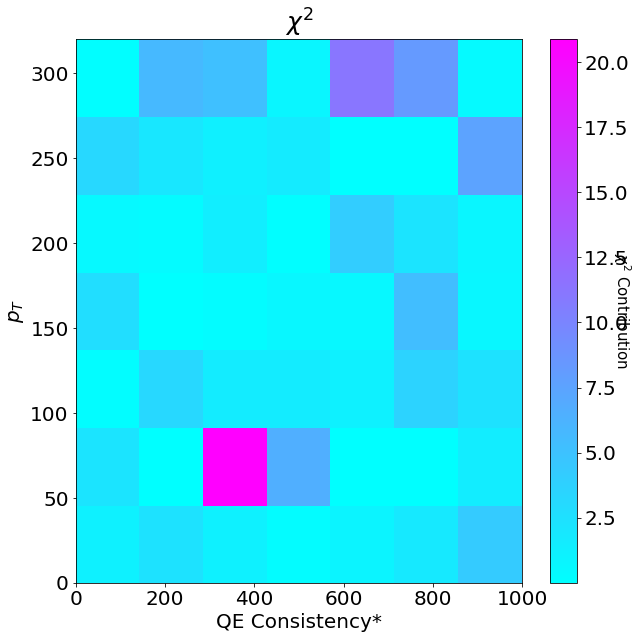

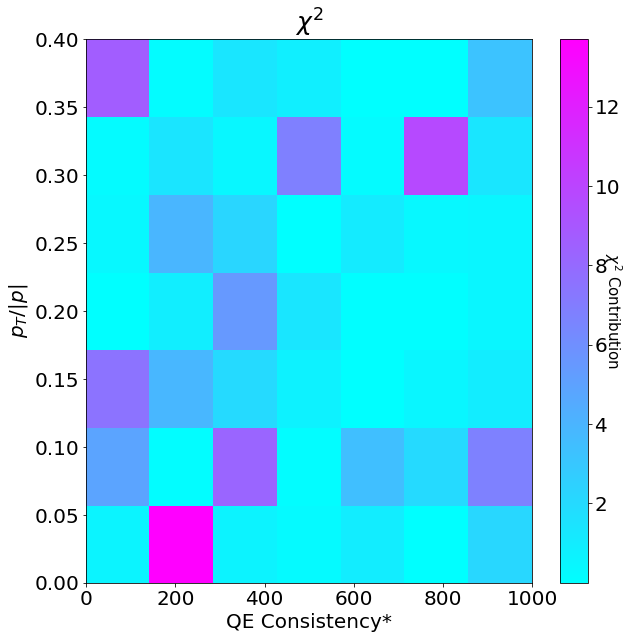

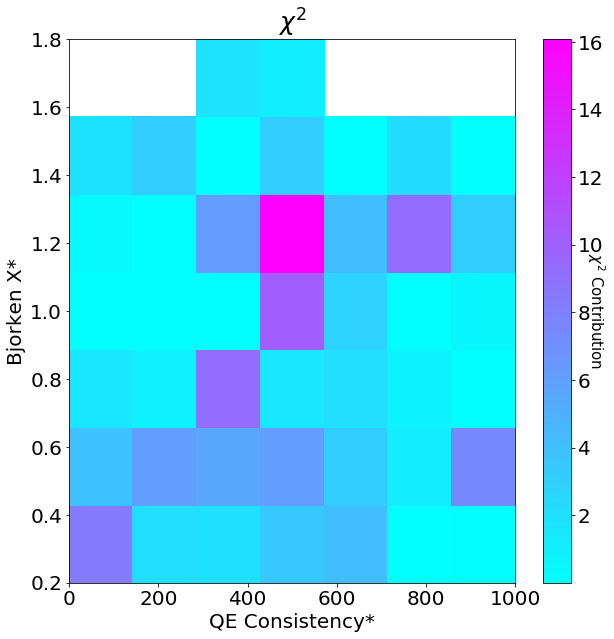

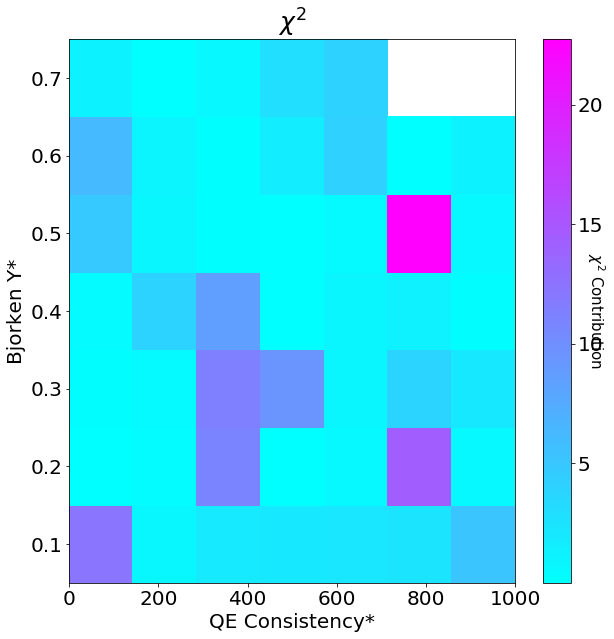

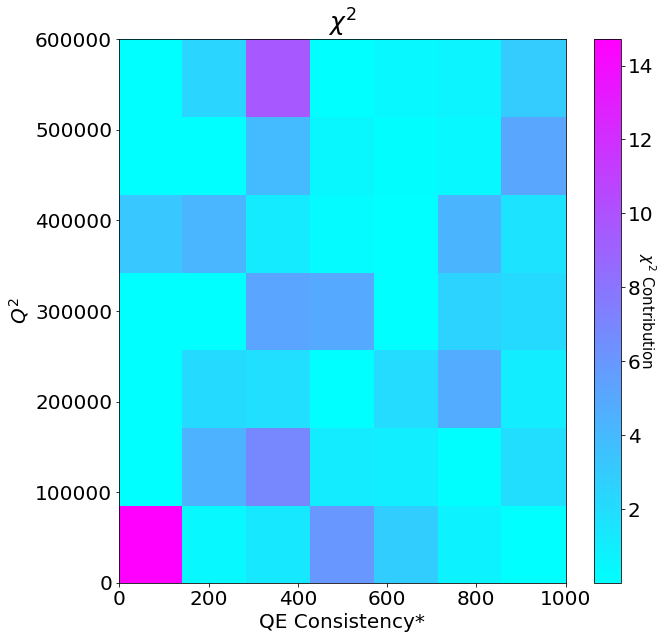

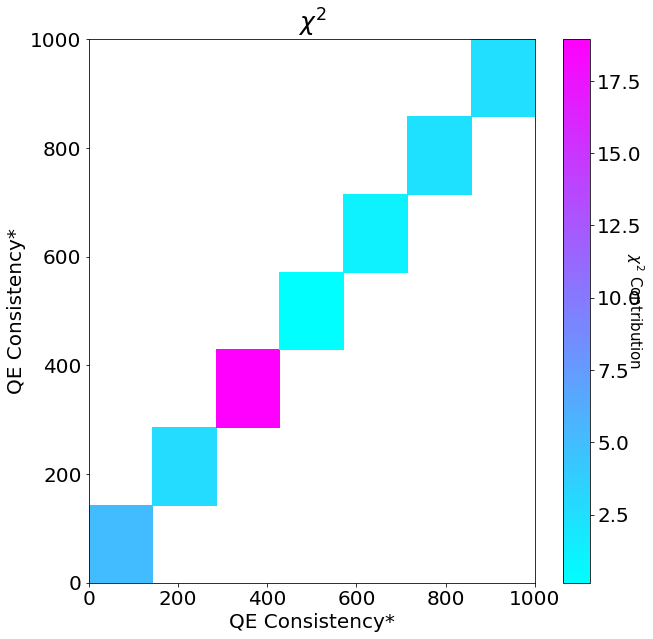

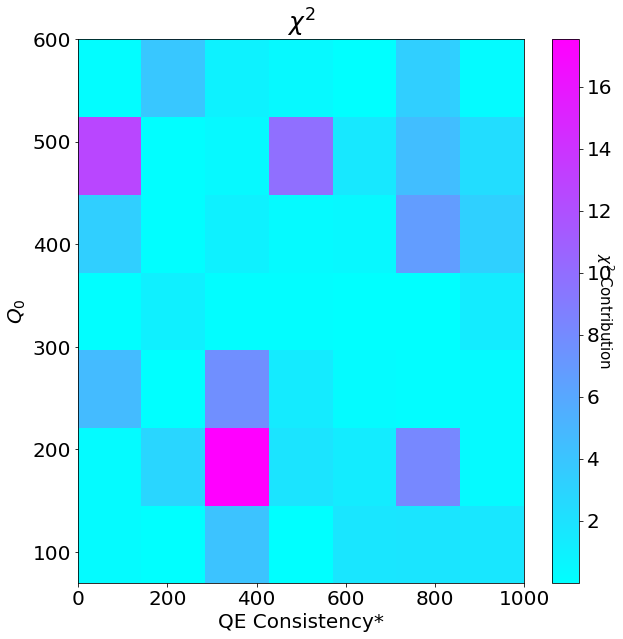

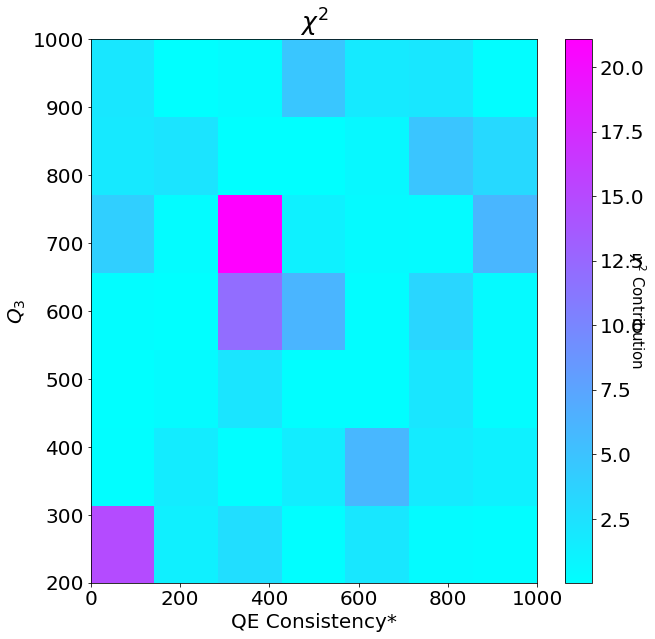

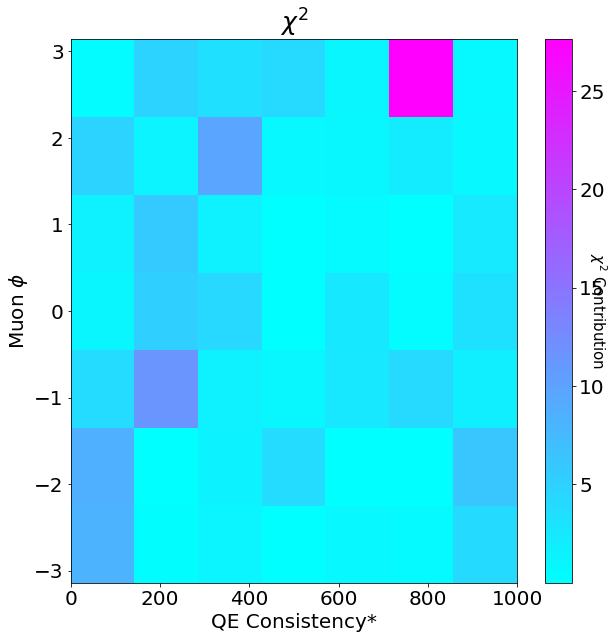

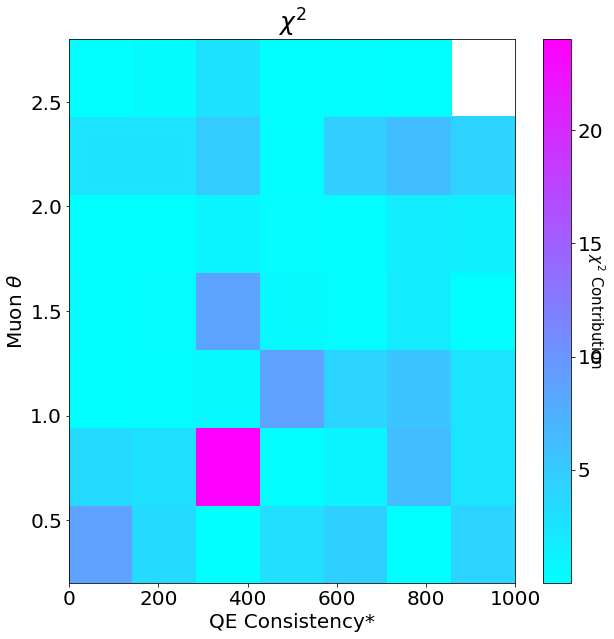

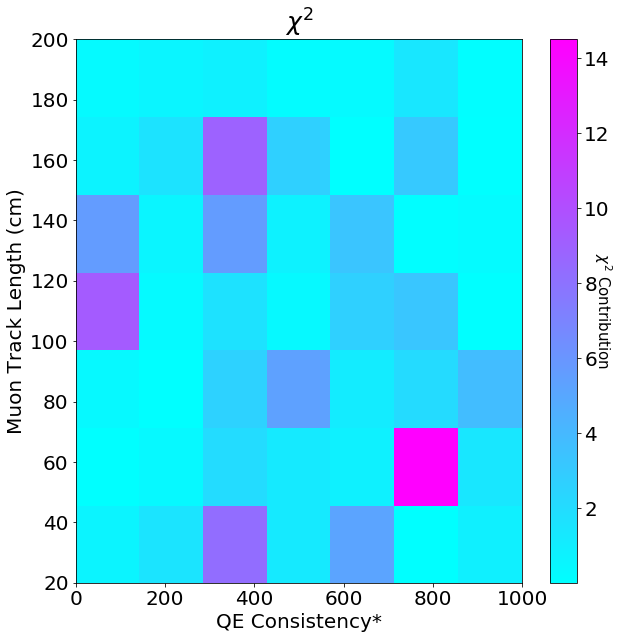

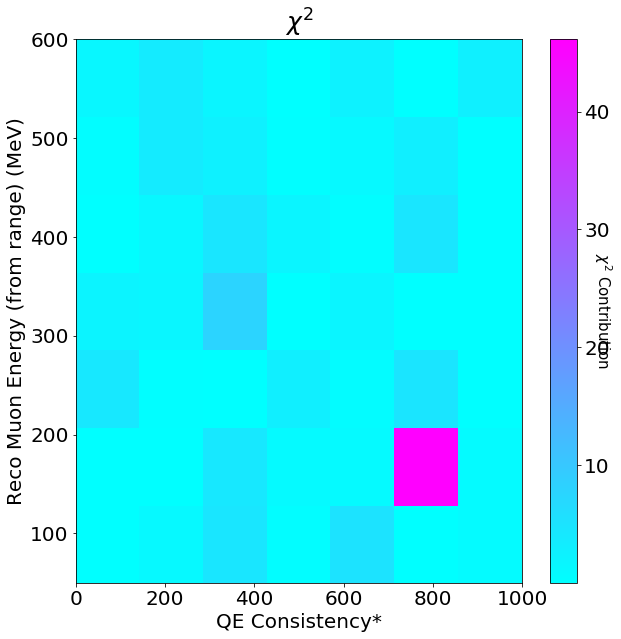

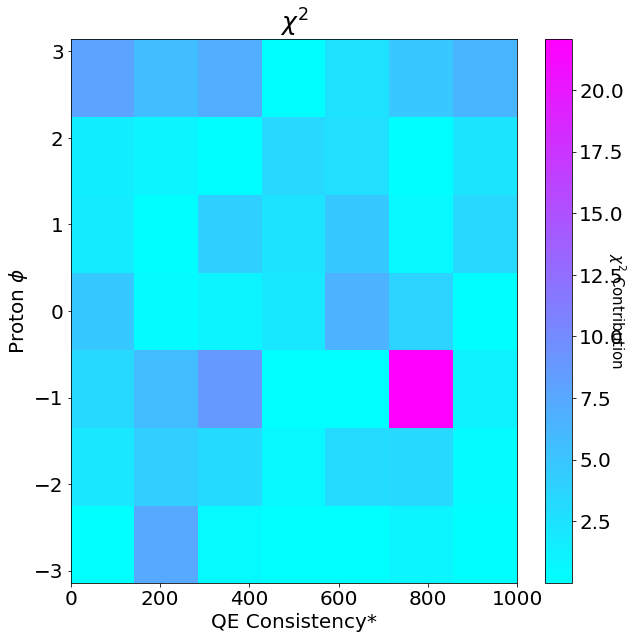

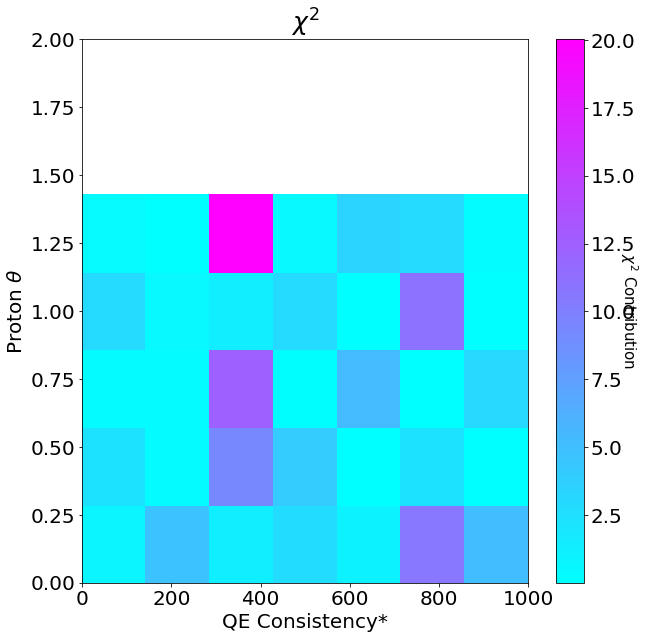

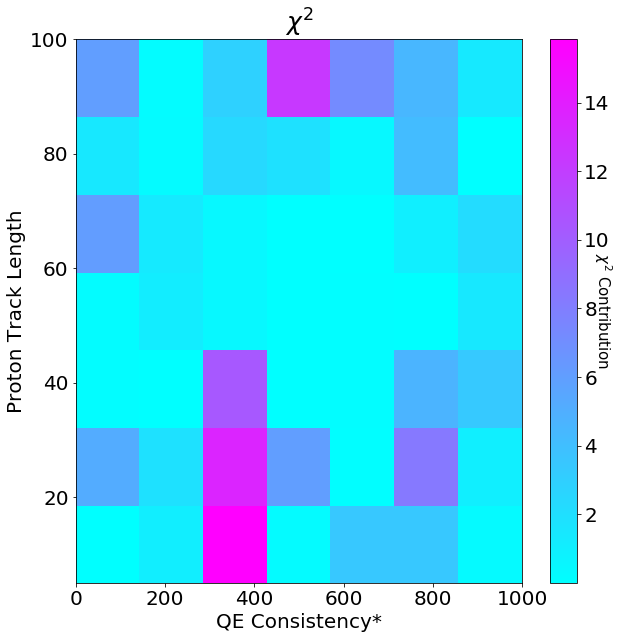

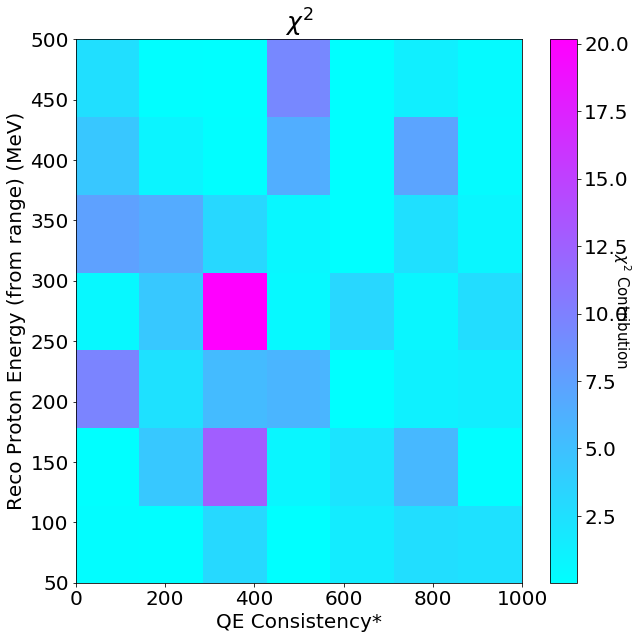

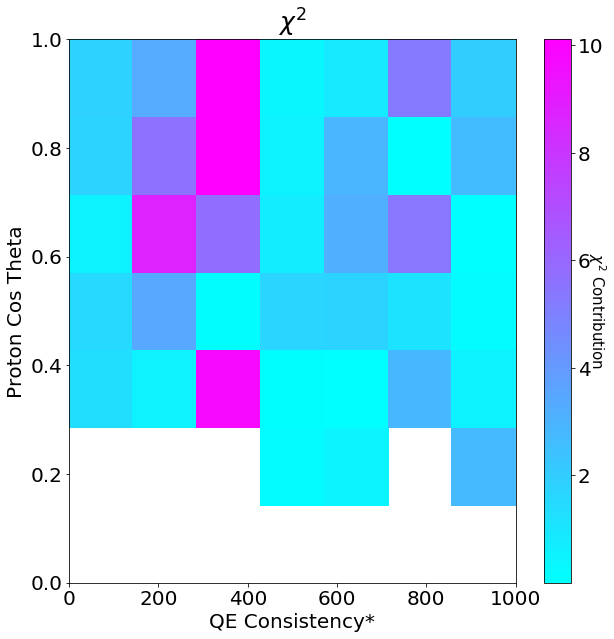

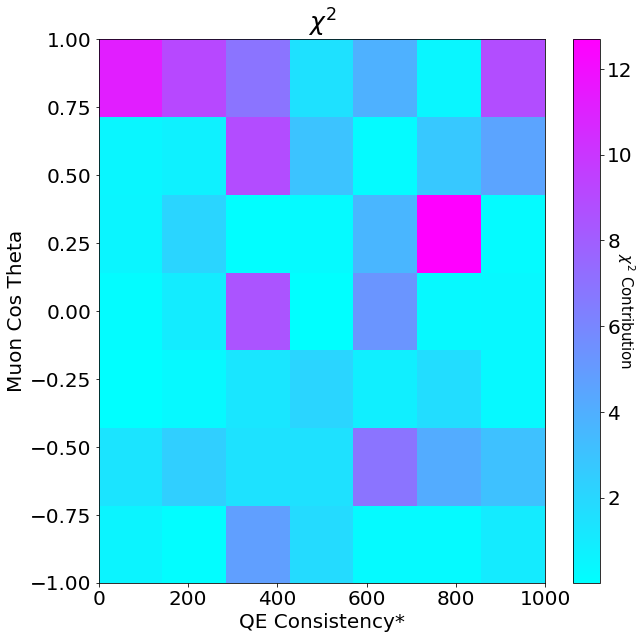

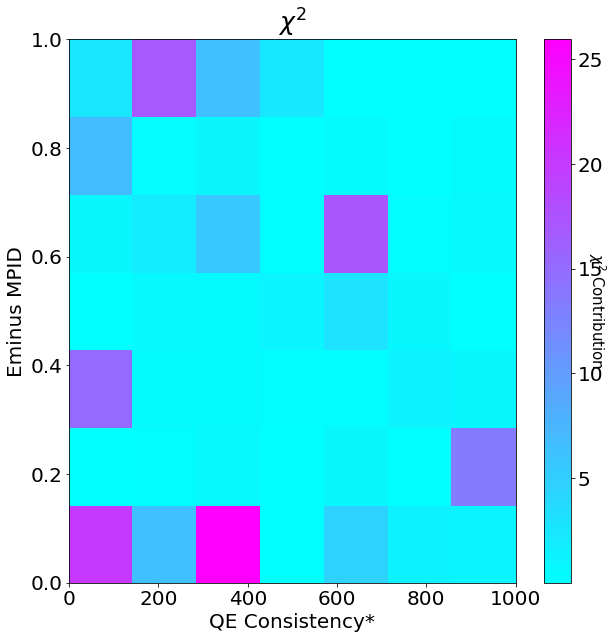

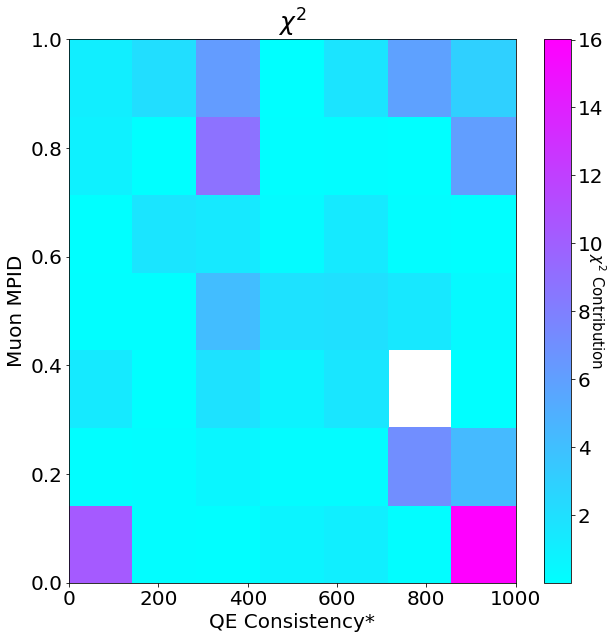

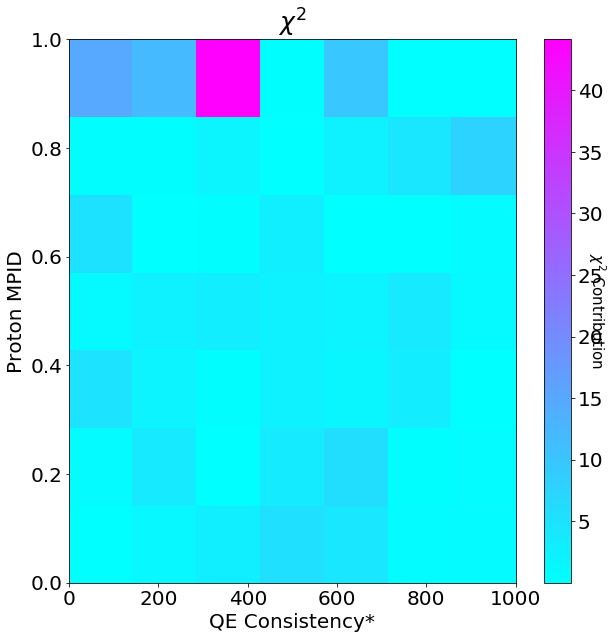

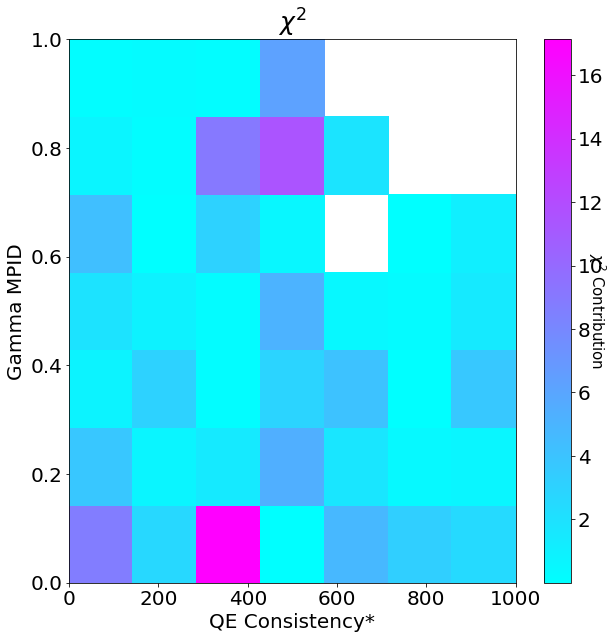

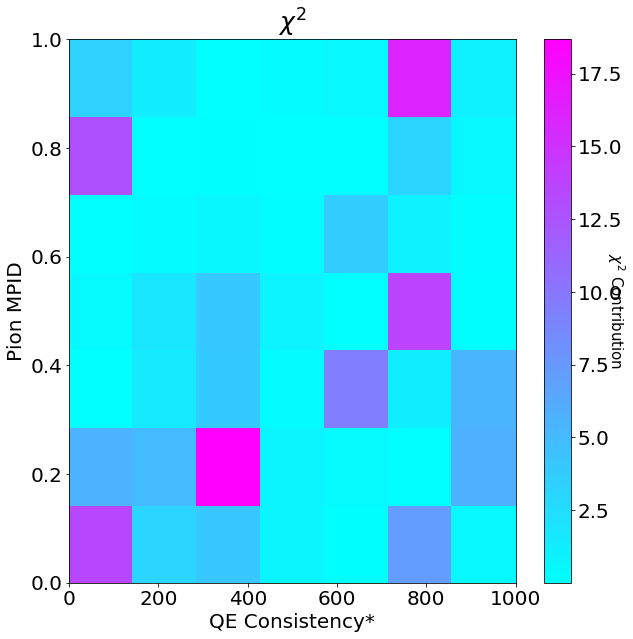

In [24]:
!!
dumphole = '2d_SphB'
varcompare = varListSel['SphB_1m1p']
#varcompare = distVar('TotPE',(0,10000))


nbins = 7

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
    
for x,dist in varListSel.items():
    print(dist.myname)
    _ = dist2d_statsonly(varcompare,dist,nbins,nbins,bigData,bigMC)
    plt.savefig(dumphole+'/'+dist.myname+'.png')

SyntaxError: invalid syntax (<ipython-input-43-6aacd145d8b5>, line 1)

Text(0.5, 0, 'BDT Score')

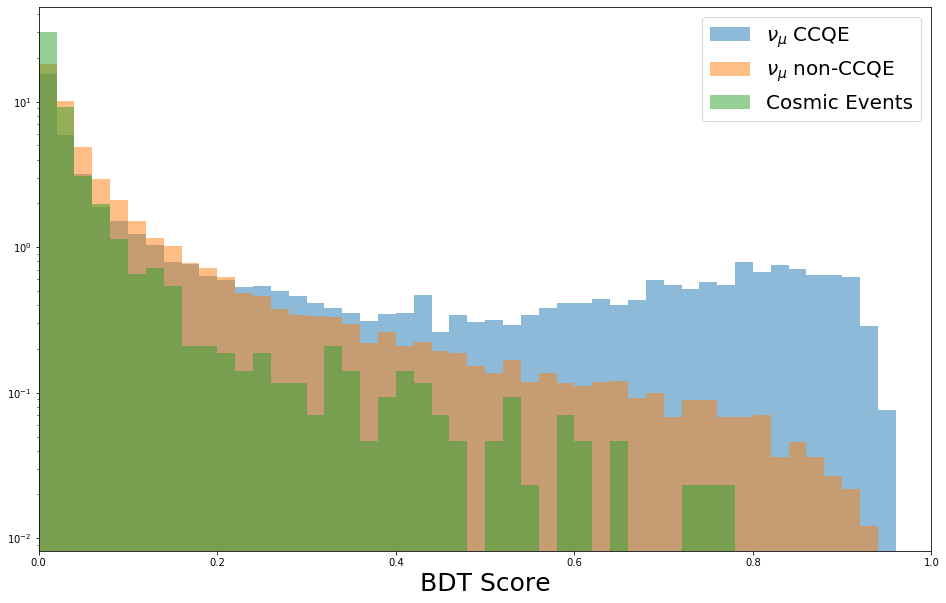

In [124]:
var_ccqe = df_numu_run1_presel.query("int_label in ['numu_CCQE']")['bkgBDT_univ']
var_nonccqe = df_numu_run1_presel.query("int_label not in ['numu_CCQE']")['bkgBDT_univ']
var_ext = df_ext_run1_presel['bkgBDT_univ']

fig,ax = plt.subplots(figsize=(16,10))
_ = plt.hist(1-var_ccqe,range=(0,1),bins=50,density=1,label=r'$\nu_\mu$ CCQE',alpha=.5)
_ = plt.hist(1-var_nonccqe,range=(0,1),bins=50,density=1,label=r'$\nu_\mu$ non-CCQE',alpha=.5)
_ = plt.hist(1-var_ext,range=(0,1),bins=50,density=1,label='Cosmic Events',alpha=.5)

ax.set_yscale('log')
ax.set_xlim((0,1))
ax.legend(fontsize=20)
ax.set_xlabel('BDT Score',fontsize=25)

(array([435., 652., 533., 448., 376., 333., 354., 242., 207., 167., 128.,
         93.,  48.,  18.]),
 array([0.2       , 0.38571429, 0.57142857, 0.75714286, 0.94285714,
        1.12857143, 1.31428571, 1.5       , 1.68571429, 1.87142857,
        2.05714286, 2.24285714, 2.42857143, 2.61428571, 2.8       ]),
 <a list of 14 Patch objects>)

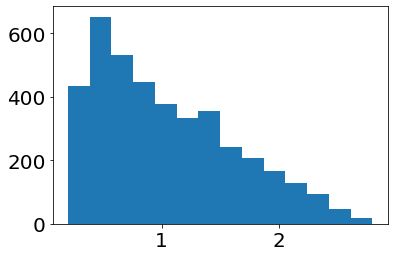

In [79]:
dumptest = pd.read_table('/home/dcianci/Downloads/numu_run3_July30_xcheck.csv',sep=',')

plt.hist(dumptest['Lepton_ThetaReco'],14,(.2,2.8))

In [56]:
# More  experiments

fullvarlist = list(df_data_run1_filter_presel)

for s_var in fullvarlist:

    try:
        vals_obs,wgt_obs,scale_obs,_,_ = bigData.GetHist(s_var)
        a_vals_pred,a_wgt_pred,a_scale_pred,_,_ = bigMC.GetHists(s_var)
       
        vals_pred = np.concatenate(a_vals_pred)
        wgt_pred = np.concatenate(a_wgt_pred)
        scale_pred = np.concatenate(a_scale_pred)
        
        lowerval = max(np.min(vals_pred),-100)
        upperval = min(np.mean(vals_pred)+np.std(vals_pred)*3,np.max(vals_pred))
        
        if upperval-lowerval <= 0:
            continue
        
        myrange = [lowerval,upperval]
        print(s_var,myrange)
    
        Hobs,binedges, = np.histogram(vals_obs,20,myrange,weights=wgt_obs*scale_obs)
        Hpred,_ = np.histogram(vals_pred,20,myrange,weights=wgt_pred*scale_pred)
    
        
        frac_dif = np.true_divide(Hobs - Hpred,Hpred,where=Hpred!=0)
        amax_frac = np.argmax(np.abs(frac_dif))
        
        dif = Hobs-Hpred
        amax = np.argmax(np.abs(dif)) 
        
        if(amax == amax_frac):
            print('Max disc by frac:',frac_dif[amax_frac],'(',Hpred[amax_frac],'at',binedges[amax_frac],')')
            print('Median disc by frac:',np.median(frac_dif))
    
            print('Max disc by dif:',dif[amax],'(',Hpred[amax],'at',binedges[amax],')')
            print('Median disc by dif:',np.median(dif))
        print('--------------------------')
        
    except:
        print('variable',s_var,'is fucked')
        print('-----------------------')

bkgBDT_univ [0.055755496, 0.39923006]
--------------------------
Proton_CosTheta [0.07383685559034348, 0.9995104670524597]
--------------------------
Lepton_CosTheta [-0.9543774127960205, 0.9858585000038147]
--------------------------
MPID_pion [0.0, 0.9796380400657654]
Max disc by frac: -0.7645054409396924 ( 29.724678259795283 at 0.09796380400657653 )
Median disc by frac: -0.3419068374496576
Max disc by dif: -22.724678259795283 ( 29.724678259795283 at 0.09796380400657653 )
Median disc by dif: -4.8930025482673
--------------------------
MPID_gamma [0.0, 0.4060636484299678]
--------------------------
MPID_proton [0.0, 0.9998769760131836]
--------------------------
MPID_muon [0.0, 0.9978150129318237]
--------------------------
MPID_eminus [0.0, 0.8532362241600084]
--------------------------
run [4982, 18953]
--------------------------
subrun [0, 1420.855306668498]
--------------------------
event [17, 71069.13924406972]
--------------------------
vtxid [0, 2.5323980574401888]
-----------

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


MaxShrFrac [-100, nan]
variable MaxShrFrac is fucked
-----------------------
MinShrFrac [-100, nan]
variable MinShrFrac is fucked
-----------------------
CCQEEnergyShift_1m1p [0.0, 4.95]
--------------------------
Enu_1m1p [288.2722, 1581.7575378417969]
--------------------------
PhiT_1m1p [0.000746974, 1.3853482007980347]
--------------------------
AlphaT_1m1p [0.003046577, 3.1057887]
Max disc by frac: -0.7846396071134973 ( 23.21689672360069 at 2.174966 )
Median disc by frac: -0.4048064841634454
Max disc by dif: -18.21689672360069 ( 23.21689672360069 at 2.174966 )
Median disc by dif: -4.400793618328124
--------------------------
PT_1m1p [4.931013, 344.6242370605469]
--------------------------
PTRat_1m1p [0.0080064265, 0.6120794415473938]
--------------------------
BjX_1m1p [0.19618957, 1.6966332793235779]
--------------------------
BjY_1m1p [0.06267194, 0.66450185]
--------------------------
Q2_1m1p [32828.33, 907146.96875]
--------------------------
Sph_1m1p [11.56004, 13298.56274414

shower1_op_2d_U [0.02, 0.28]
--------------------------
shower1_op_2d_V [0.02, 0.28]
--------------------------
shower1_op_2d_Y [0.02, 0.28]
--------------------------
shower1_start_2d_U_X [171, 2219]
Max disc by frac: -0.739225858962747 ( 23.00841631050705 at 1604.6000000000001 )
Median disc by frac: -0.327033483131223
Max disc by dif: -17.00841631050705 ( 23.00841631050705 at 1604.6000000000001 )
Median disc by dif: -2.7703636833822367
--------------------------
shower1_start_2d_U_Y [550, 672]
--------------------------
shower1_start_2d_V_X [176, 2226]
--------------------------
shower1_start_2d_V_Y [550, 671]
--------------------------
shower1_start_2d_Y_X [78, 3313]
--------------------------
shower1_start_2d_Y_Y [553, 668.8295859172425]
--------------------------
_shower1_impact [0.0, 16.58846080303192]
--------------------------
shower1_smallQ_U [115.50499, 67927.19140625]
--------------------------
shower1_smallQ_V [153.8, 79866.1650390625]
--------------------------
shower1_sma

variable GammaPID_pix_v is fucked
-----------------------
variable PionPID_pix_v is fucked
-----------------------


In [ ]:
(list(df_data_run1_filter_presel)

In [25]:
fullvarlist = ['Enu_1m1p','Xreco']#list(df_data_run1_filter_presel)

for s_var in fullvarlist:
    vals_obs,wgt_obs,scale_obs,_,_ = bigData.GetHist(s_var)
    a_vals_pred,a_wgt_pred,a_scale_pred,_,_ = bigMC.GetHists(s_var)
   
    vals_pred = np.concatenate(a_vals_pred)
    wgt_pred = np.concatenate(a_wgt_pred)
    scale_pred = np.concatenate(a_scale_pred)

    print(np.mean(vals_pred)+np.std(vals_pred)*3)
    print(np.max(vals_pred))
    min(np.mean(vals_pred)+np.std(vals_pred)*3,np.max(vals_pred))

1539.6705017089844
2388.1643
315.5622444152832
246.15744


In [ ]:
# run1HistsLabel = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel),(NUMU_RUN1_SCALE,NUMU_LOWE_RUN1_SCALE,NUE_RUN1_SCALE))
# run1HistsLabel.AddStrata("int_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
# run1HistsLabel.AddStrata("int_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan',f_wgt=2.0)
# run1HistsLabel.AddStrata("int_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen',f_wgt=1.2)
# run1HistsLabel.AddStrata("int_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow',f_wgt=1.2)
# run1HistsLabel.AddStrata("int_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
# run1HistsLabel.AddStrata("int_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold',f_wgt=1.2)
# #run1HistsLabel.AddLayer(df_dirt_run1_presel,DIRT_RUN1_SCALE,1,'Dirt','peru')
# run1HistsLabel.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')


In [ ]:
run3Hists.ClearCut()
s_trainingcut = 'not (InTraining==1)'#morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts+ ' and (InTraining==1)'
run3Hists.AddCut(s_trainingcut)
hp_vals,hp_wgts,hp_scale,hp_cols,hp_noms = run3Hists.GetHists('bkgBDT_univ')


fig,ax = plt.subplots(figsize=(20,12))

_ = ax.hist(hp_vals,20,range=(0,1),weights=hp_wgts*hp_scale,stacked=True,color=hp_cols,label=hp_noms)

ax.legend(fontsize=20,ncol=3)
ax.set_yscale('log')

wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit Degrees: 0 8.37141121758355
LYdownRayleigh 1m1p Polyfit Degrees: 0 10.376294983757866
SCE 1m1p Polyfit Degrees: 0 19.975596321953667
wiremodThetaYZ 1m1p Polyfit Degrees: 0 20.225785149468315
wiremodThetaXZ 1m1p Polyfit Degrees: 0 14.197621239556206
wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit Degrees: 0 8.37141121758355
LYdownRayleigh 1m1p Polyfit Degrees: 0 10.376294983757866
SCE 1m1p Polyfit Degrees: 0 19.975596321953667


/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/DetSysScripts.py:263: RuntimeWarning: invalid value encountered in double_scalars
  cov_poly[i,j] += (hSys[i]-hCV[i])*(hSys[j]-hCV[j])/(hCV[i]*hCV[j])


wiremodThetaYZ 1m1p Polyfit Degrees: 0 20.225785149468315
wiremodThetaXZ 1m1p Polyfit Degrees: 0 14.197621239556206
Proton_CosTheta > 0 and (MPID_proton > .9 or Enu_1m1p > 400) and bkgBDT_univ < 0.200000
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (2.24)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (1.07)', '$\\nu_e$ Intrinsic (0.03)', 'BNB Other (1.83)', 'BNB 1L1P Off Vertex (13.52)', 'Cosmic Bkg [Run 1] (0.00)', 'Cosmic Bkg [Run 3(x2)] (13.21)']
Normalization Uncertainty: 0.12279400032479616
1.4398232003839155 0.09661628784650145


/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/PlottingScripts.py:432: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bincenters,np.true_divide(vals_data,vals_mc),yerr=(er_rat_dotshi,er_rat_dotslo),fmt='o',color='maroon',capsize=0,markersize=8,elinewidth=2)


wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit Degrees: 0 8.37141121758355
LYdownRayleigh 1m1p Polyfit Degrees: 0 10.376294983757866
SCE 1m1p Polyfit Degrees: 0 19.975596321953667
wiremodThetaYZ 1m1p Polyfit Degrees: 0 20.225785149468315
wiremodThetaXZ 1m1p Polyfit Degrees: 0 14.197621239556206
Proton_CosTheta > 0 and (MPID_proton > .9 or Enu_1m1p > 400) and bkgBDT_univ < 0.210000
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (2.24)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (1.07)', '$\\nu_e$ Intrinsic (0.03)', 'BNB Other (1.83)', 'Cosmic Bkg [Run 1] (0.00)', 'Cosmic Bkg [Run 3(x2)] (13.21)']
Normalization Uncertainty: 0.12310767961243003
1.355058692386658 0.1374200613580192
wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit 

Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (3.31)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (2.02)', '$\\nu_e$ Intrinsic (0.08)', 'BNB Other (1.83)', 'Cosmic Bkg [Run 1] (1.73)']
Normalization Uncertainty: 0.125620564833212
1.2302000618605 0.22127833750654946
wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit Degrees: 0 8.37141121758355
LYdownRayleigh 1m1p Polyfit Degrees: 0 10.376294983757866
SCE 1m1p Polyfit Degrees: 0 19.975596321953667
wiremodThetaYZ 1m1p Polyfit Degrees: 0 20.225785149468315
wiremodThetaXZ 1m1p Polyfit Degrees: 0 14.197621239556206
Proton_CosTheta > 0 and (MPID_proton > .9 or Enu_1m1p > 400) and bkgBDT_univ < 0.320000
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (3.31)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (2.02)', '$\\nu_e$ Intrinsic (0.08)', 'BNB Other (2.31)', 'Cosmic Bkg [Run 1] (1.73)']
Normalization Uncertainty: 0.

KeyboardInterrupt: 

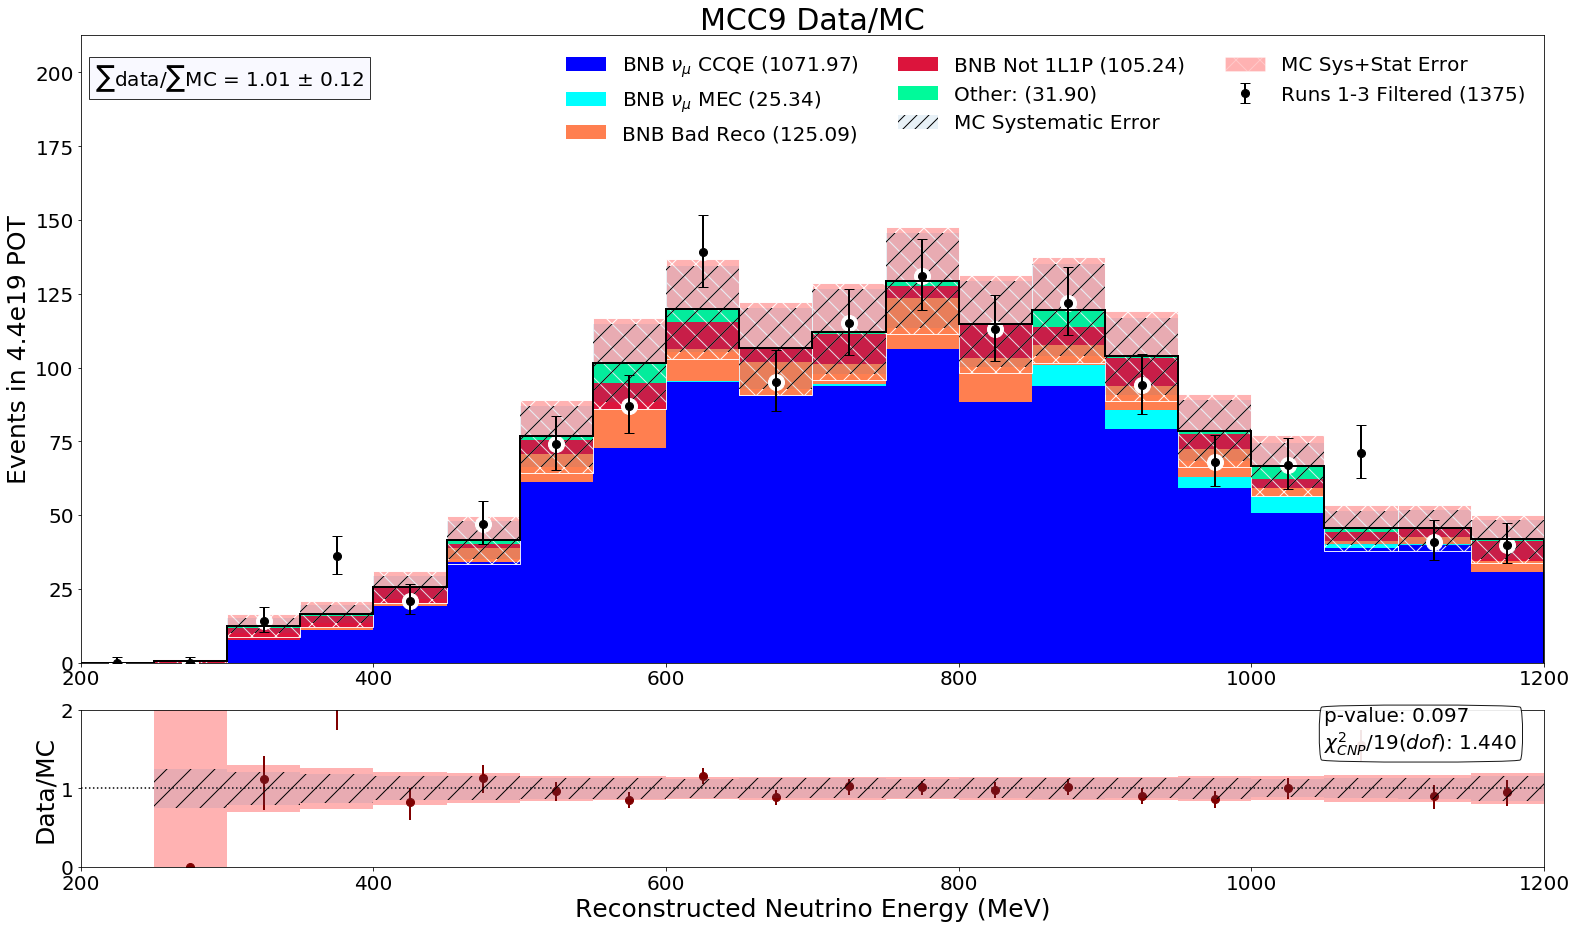

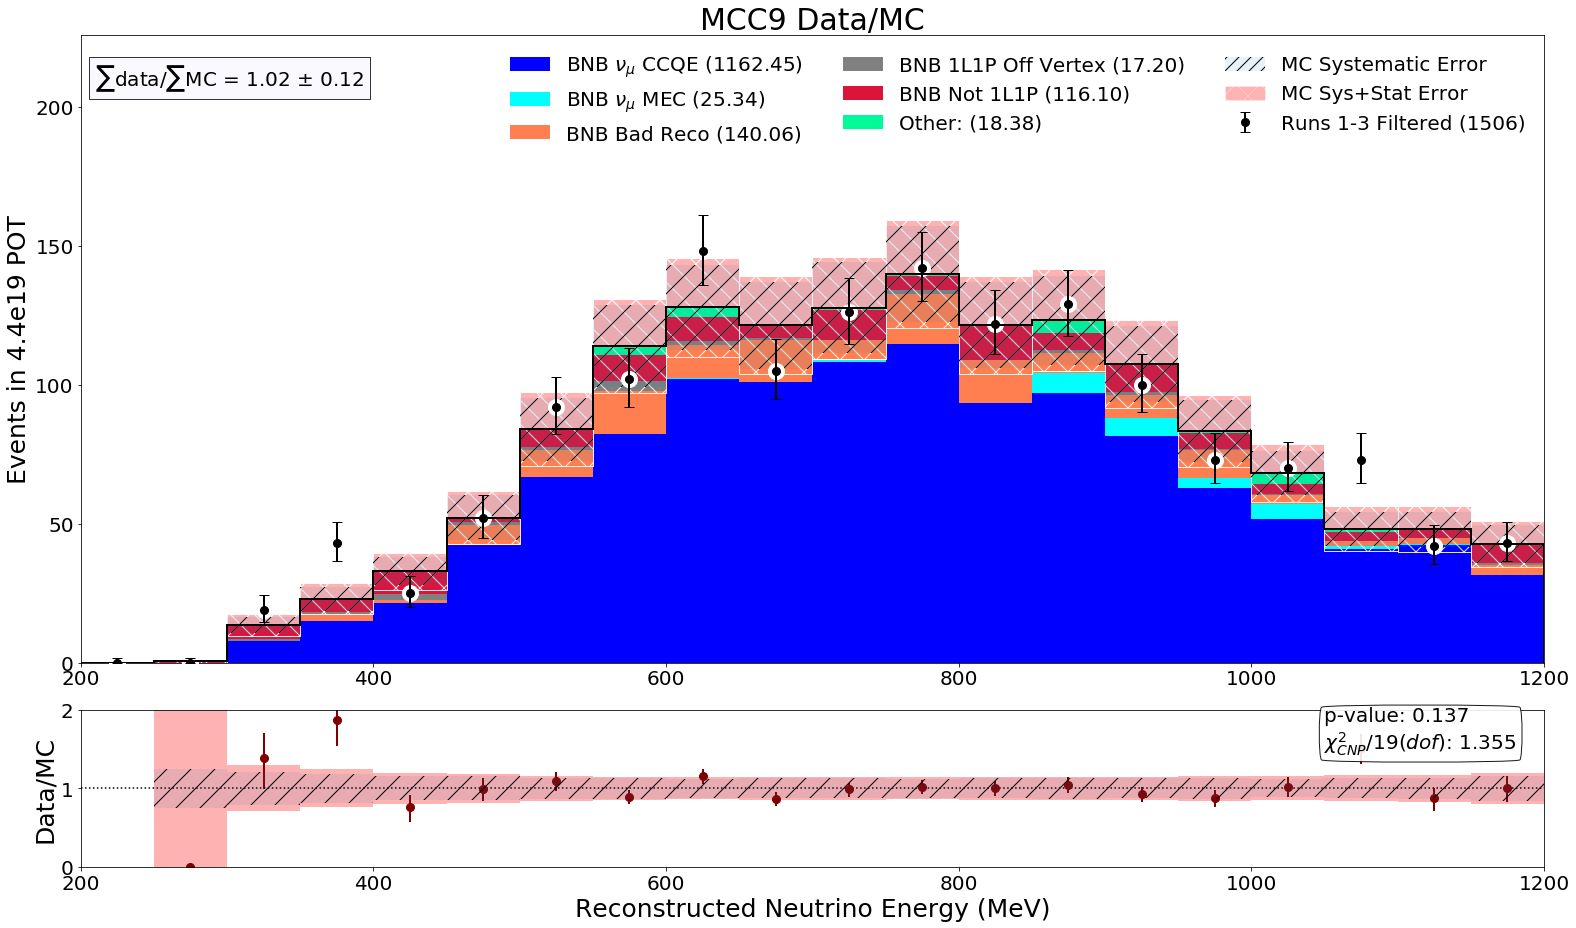

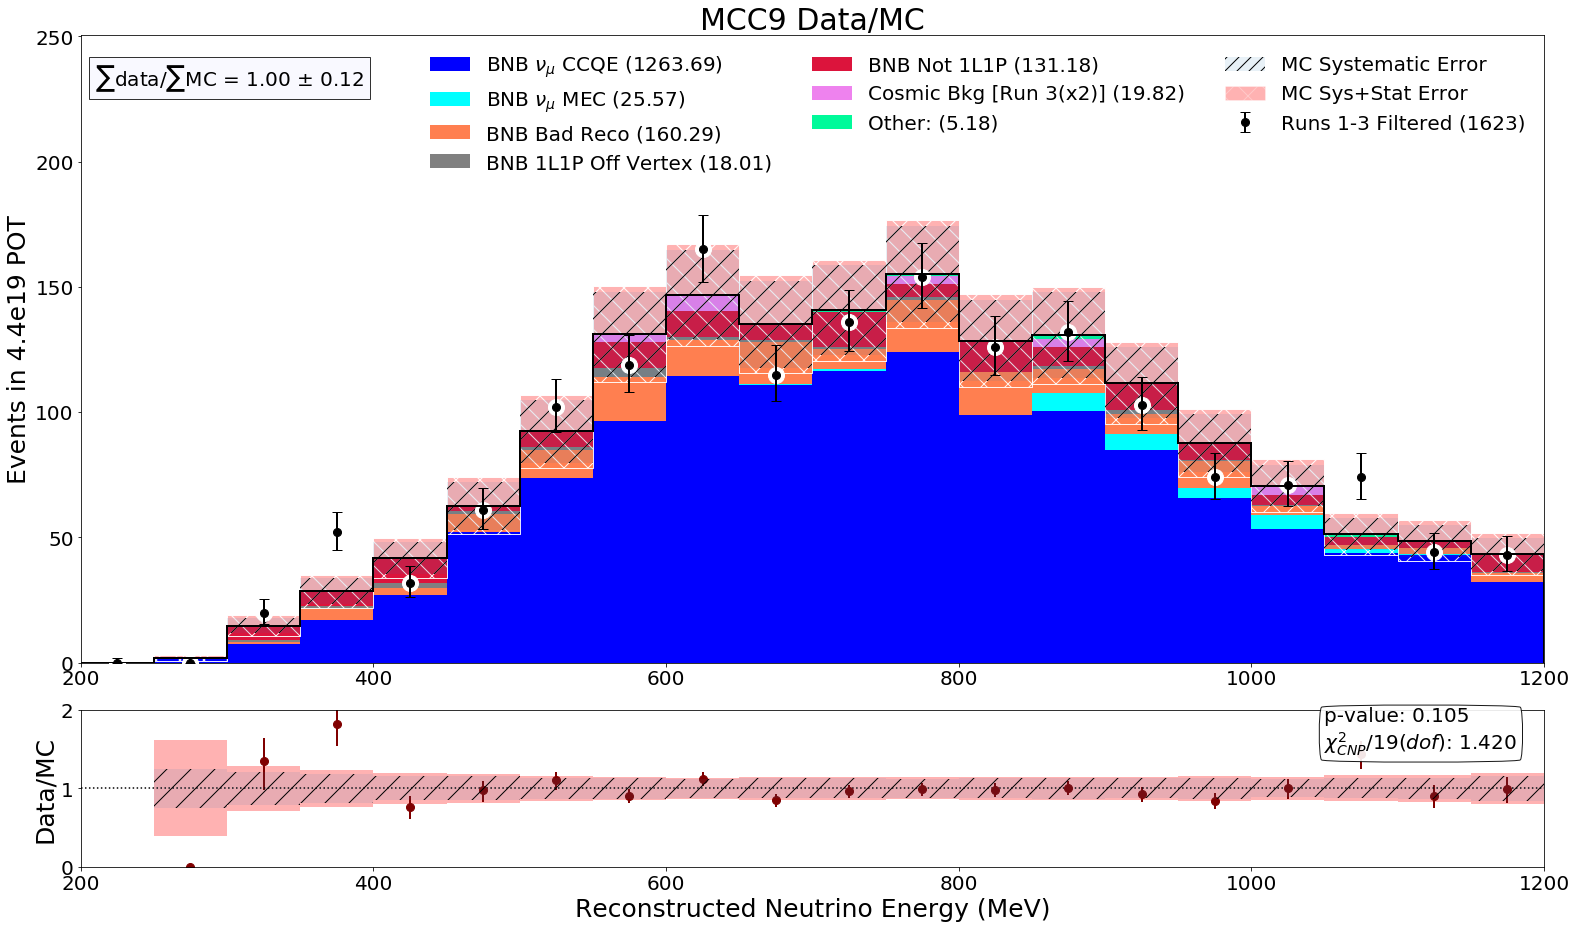

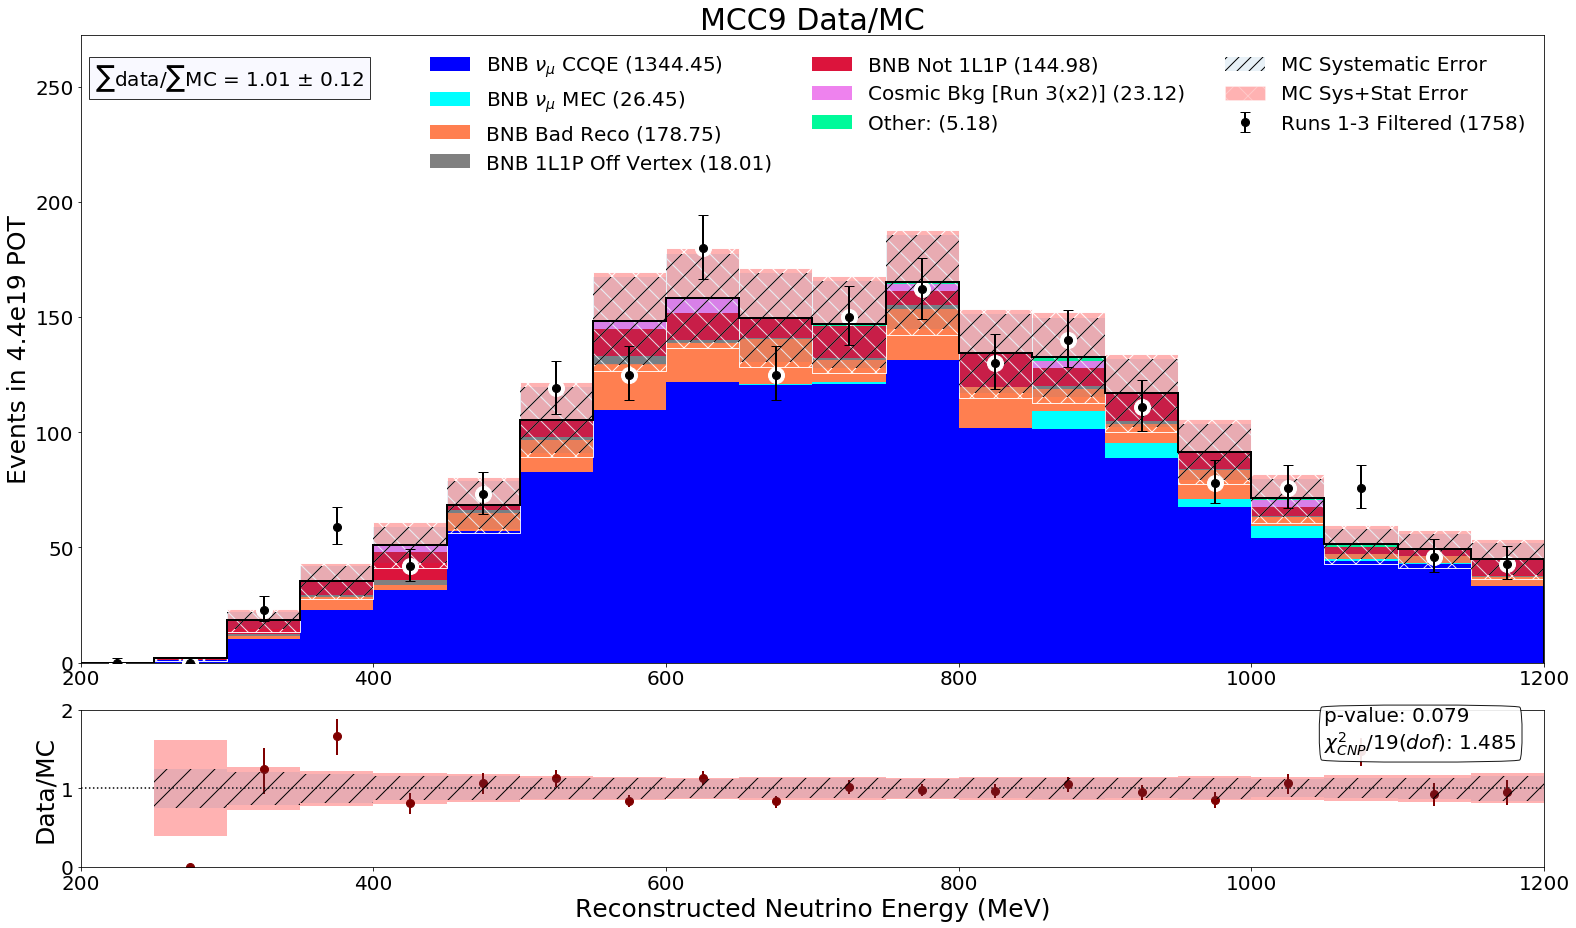

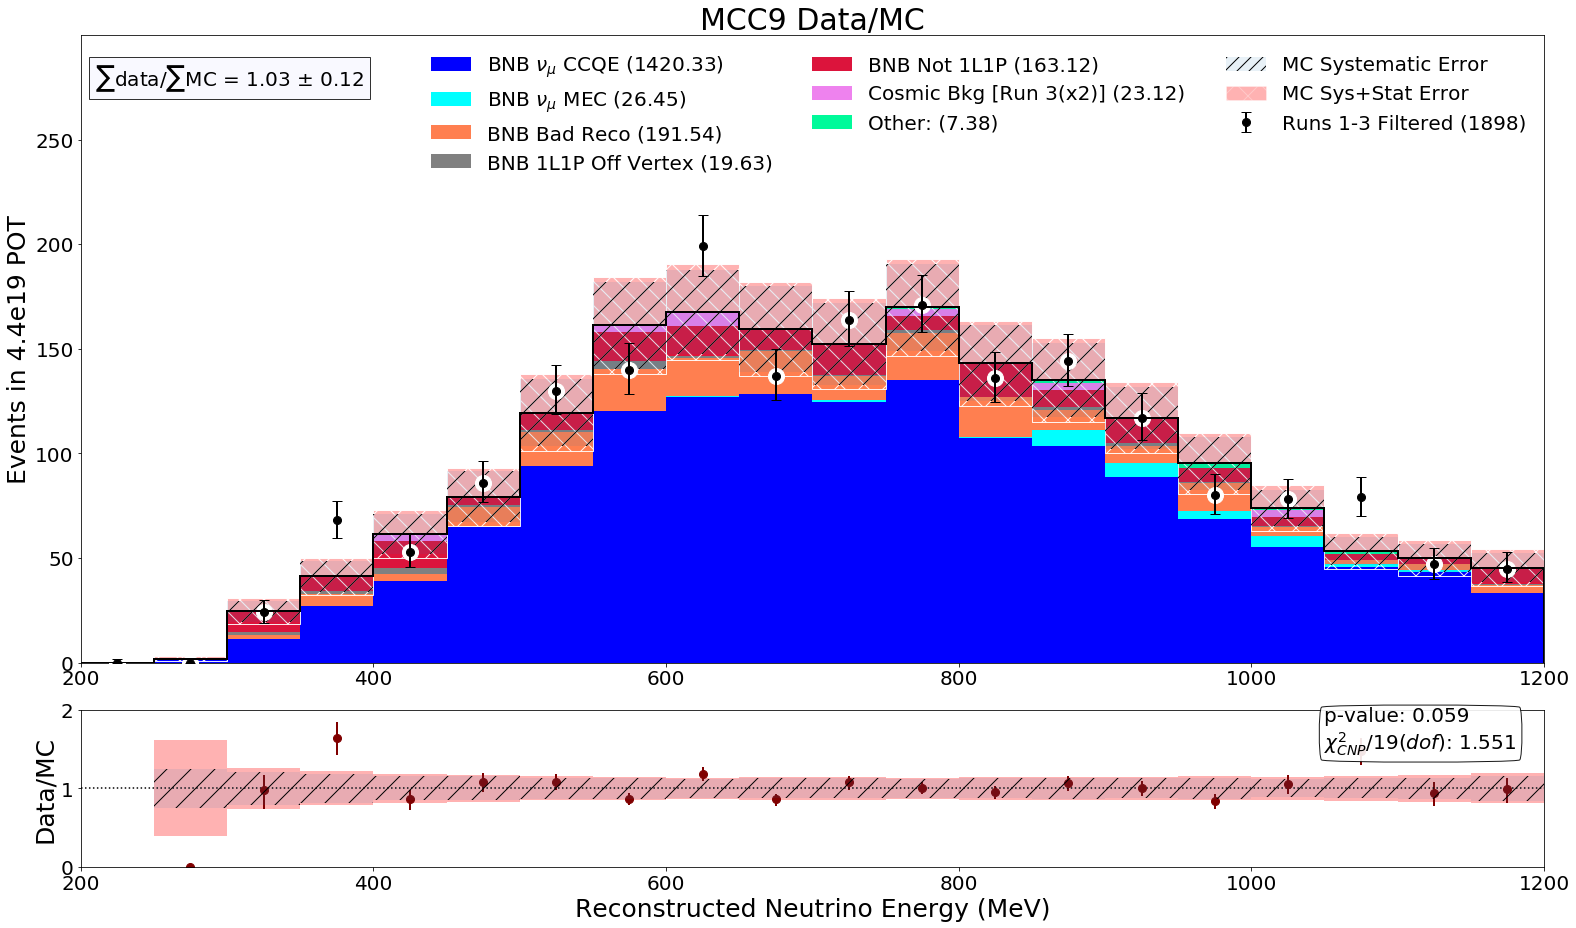

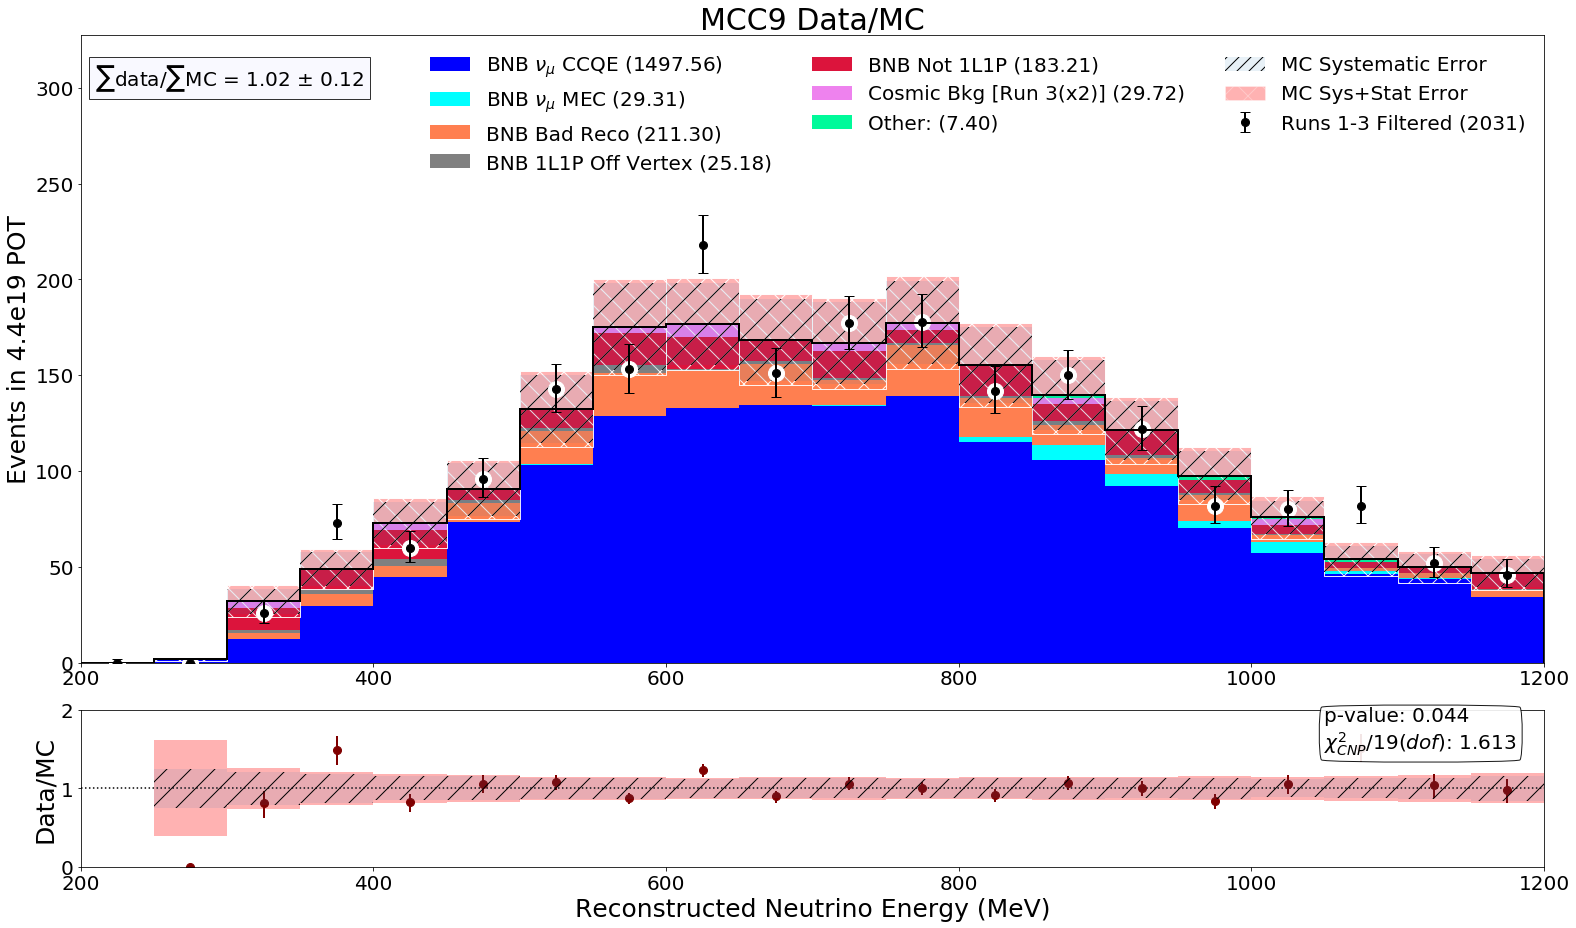

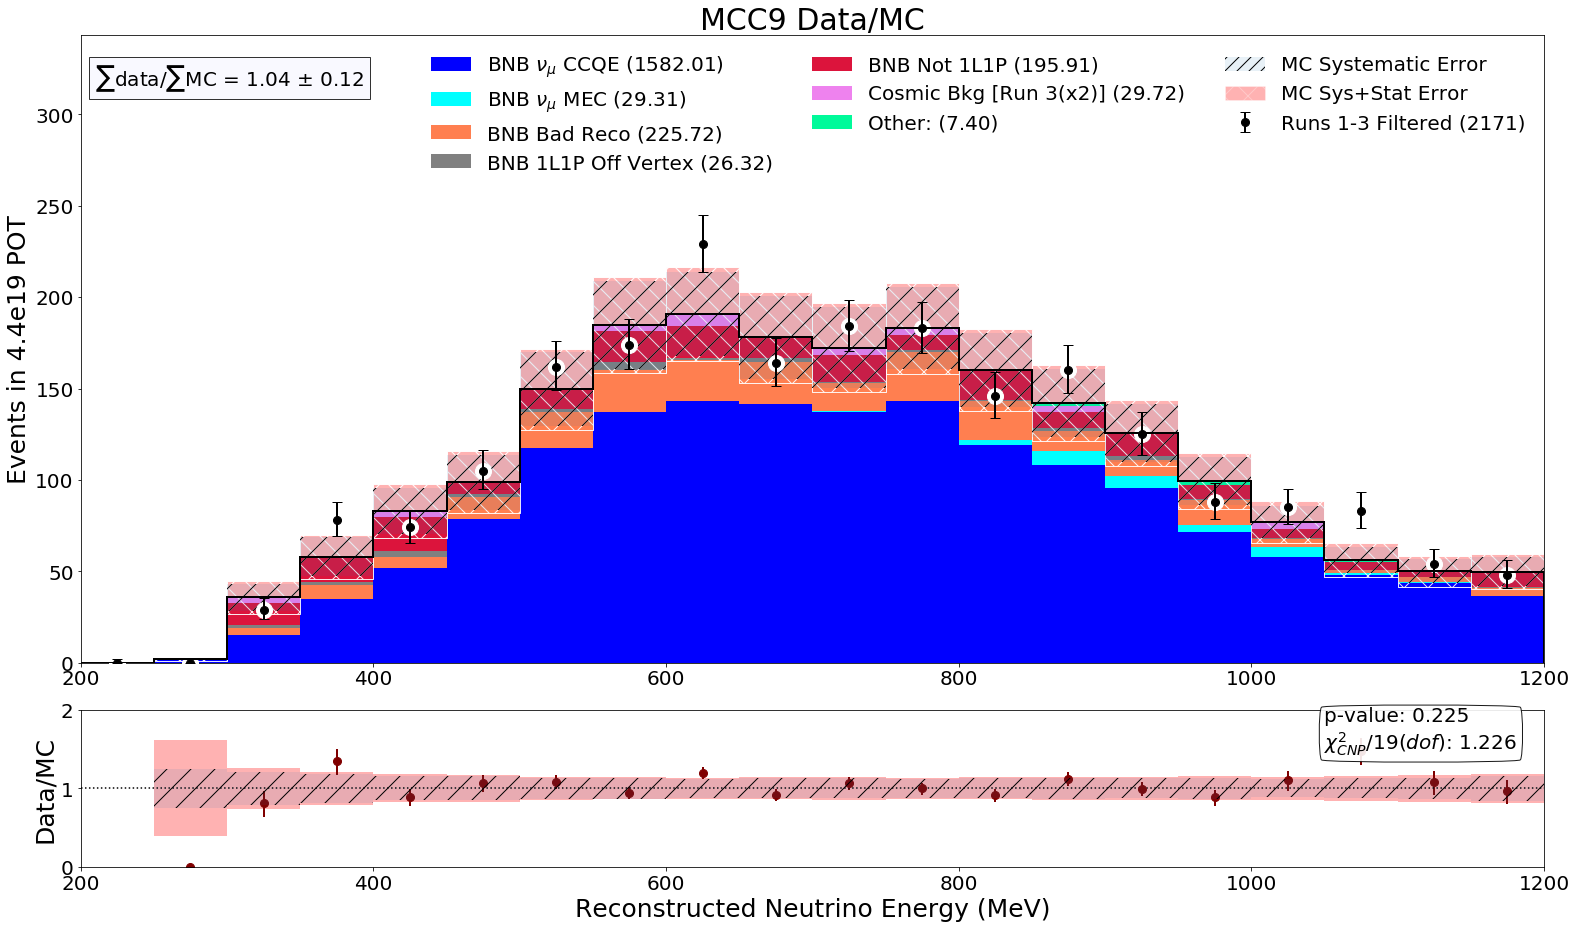

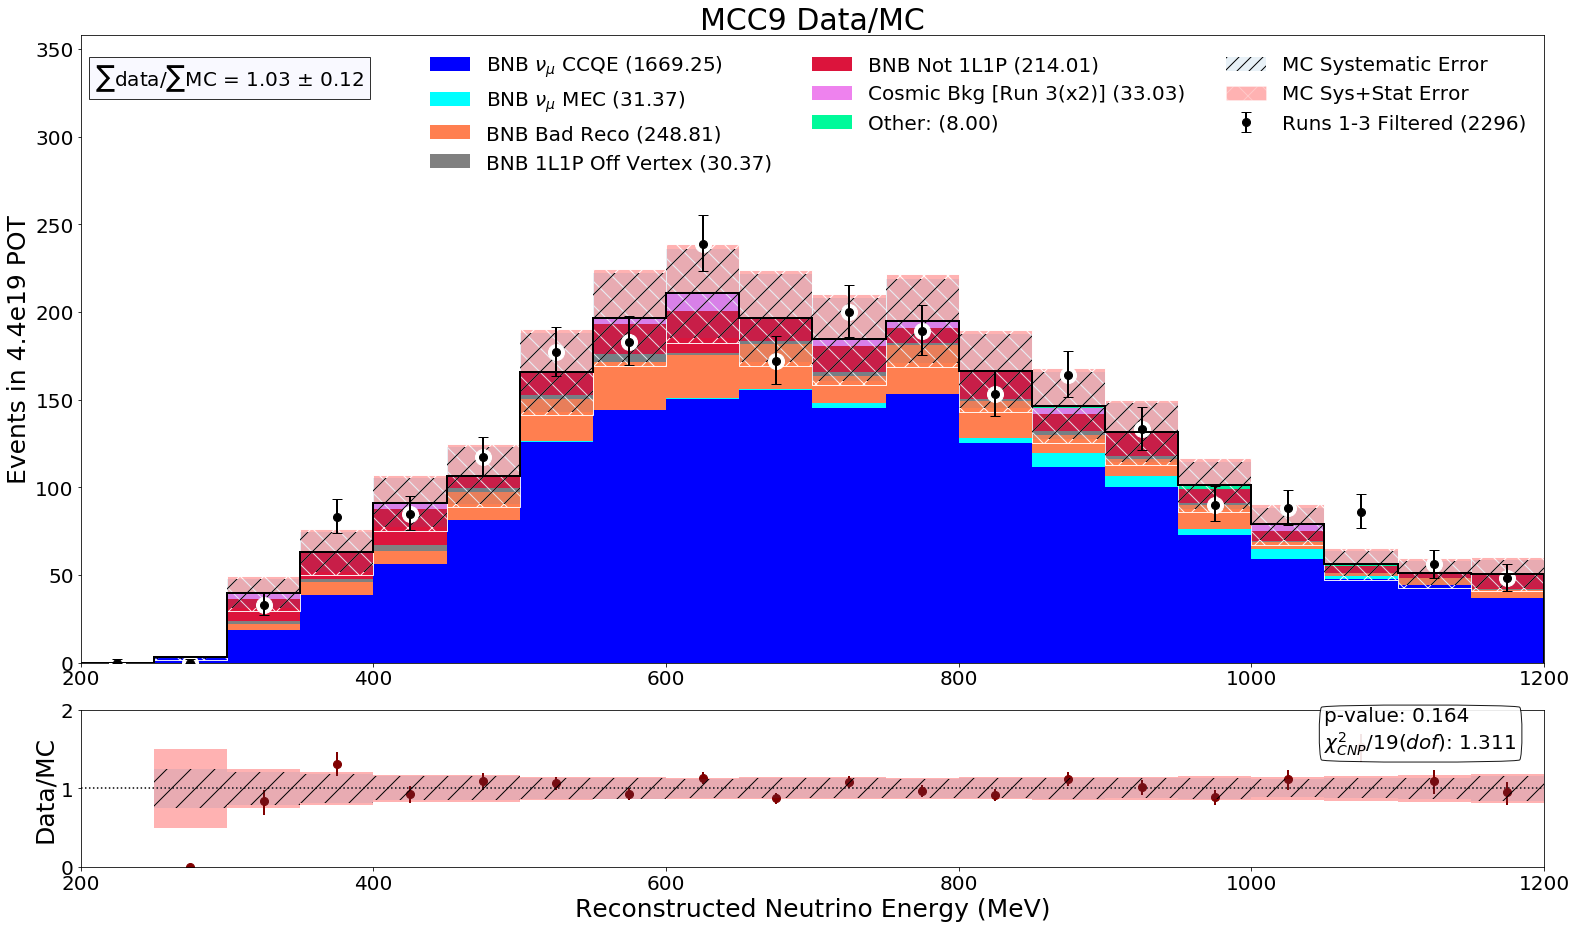

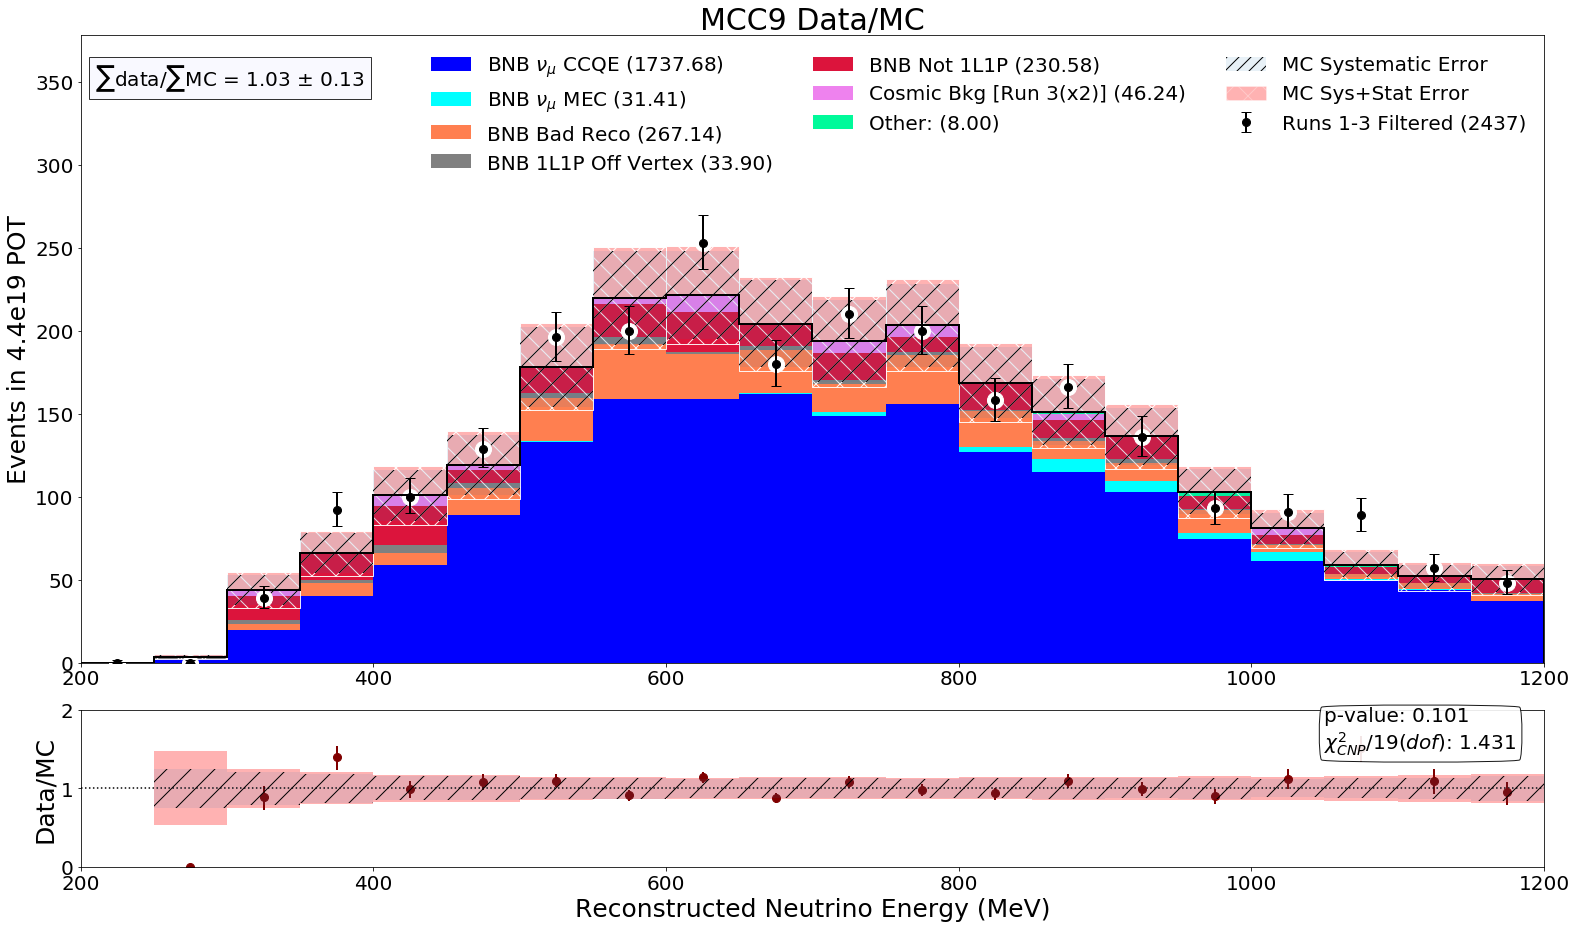

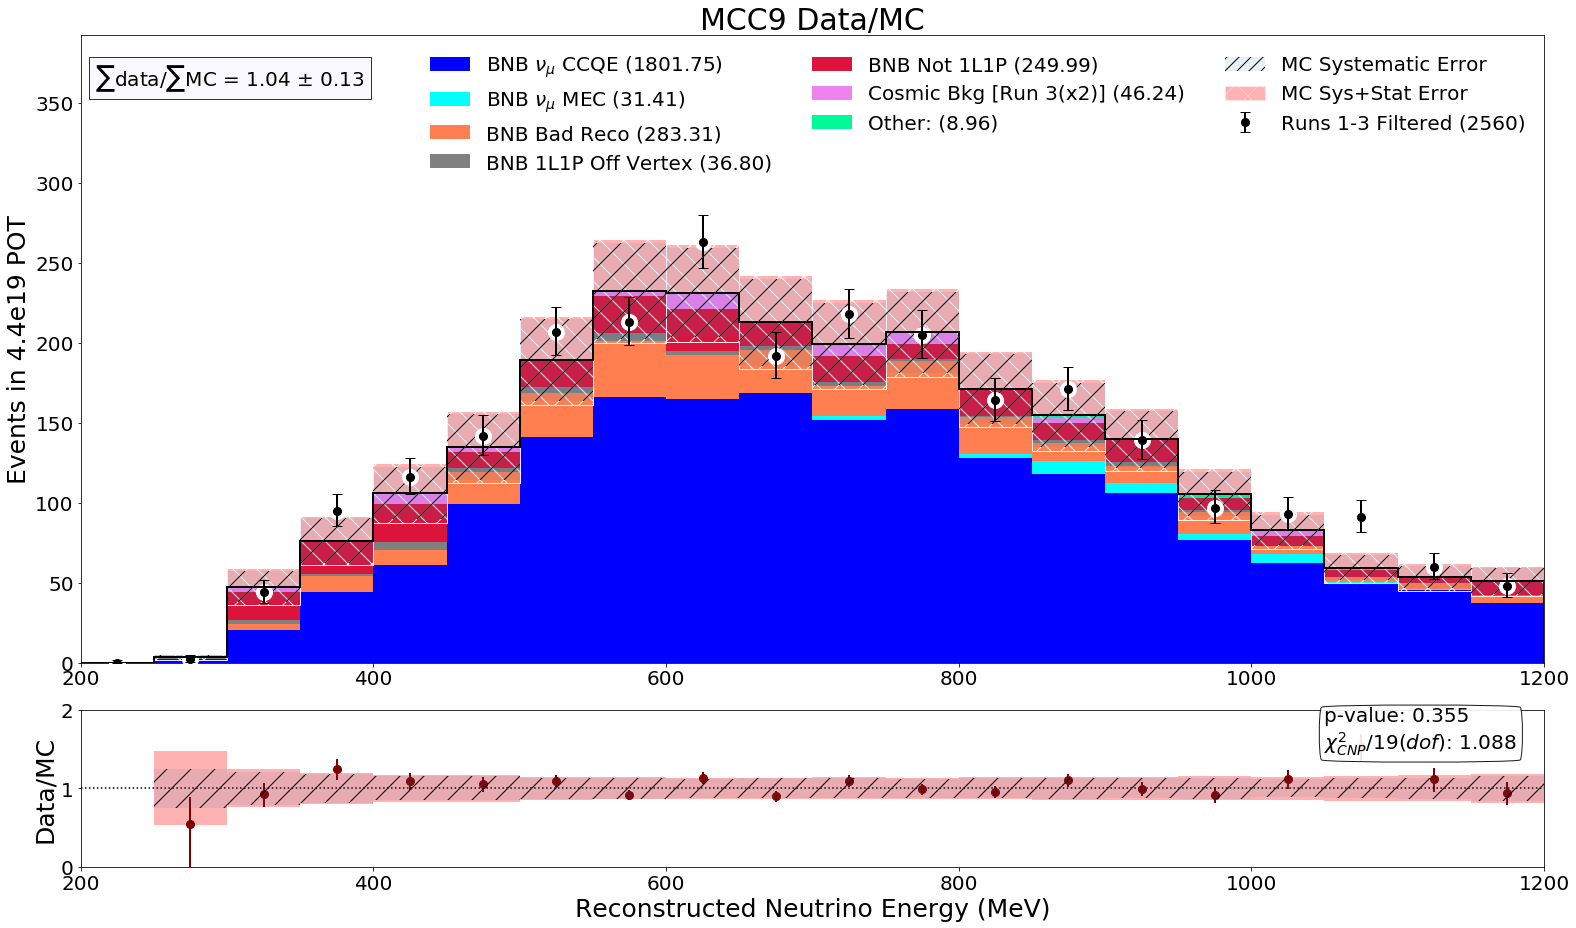

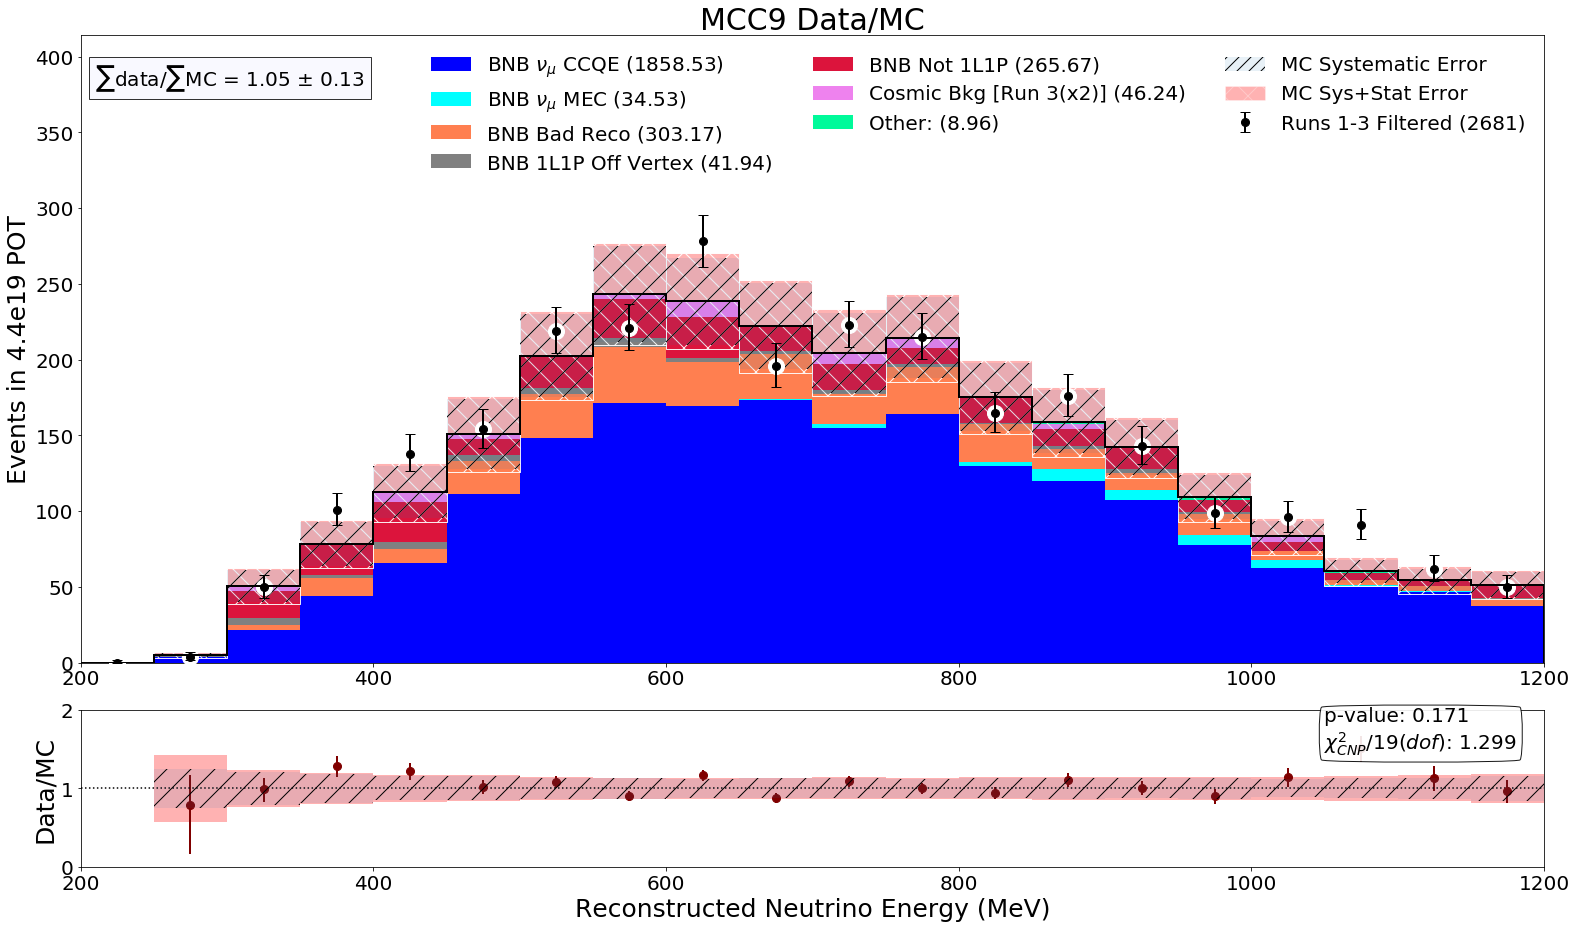

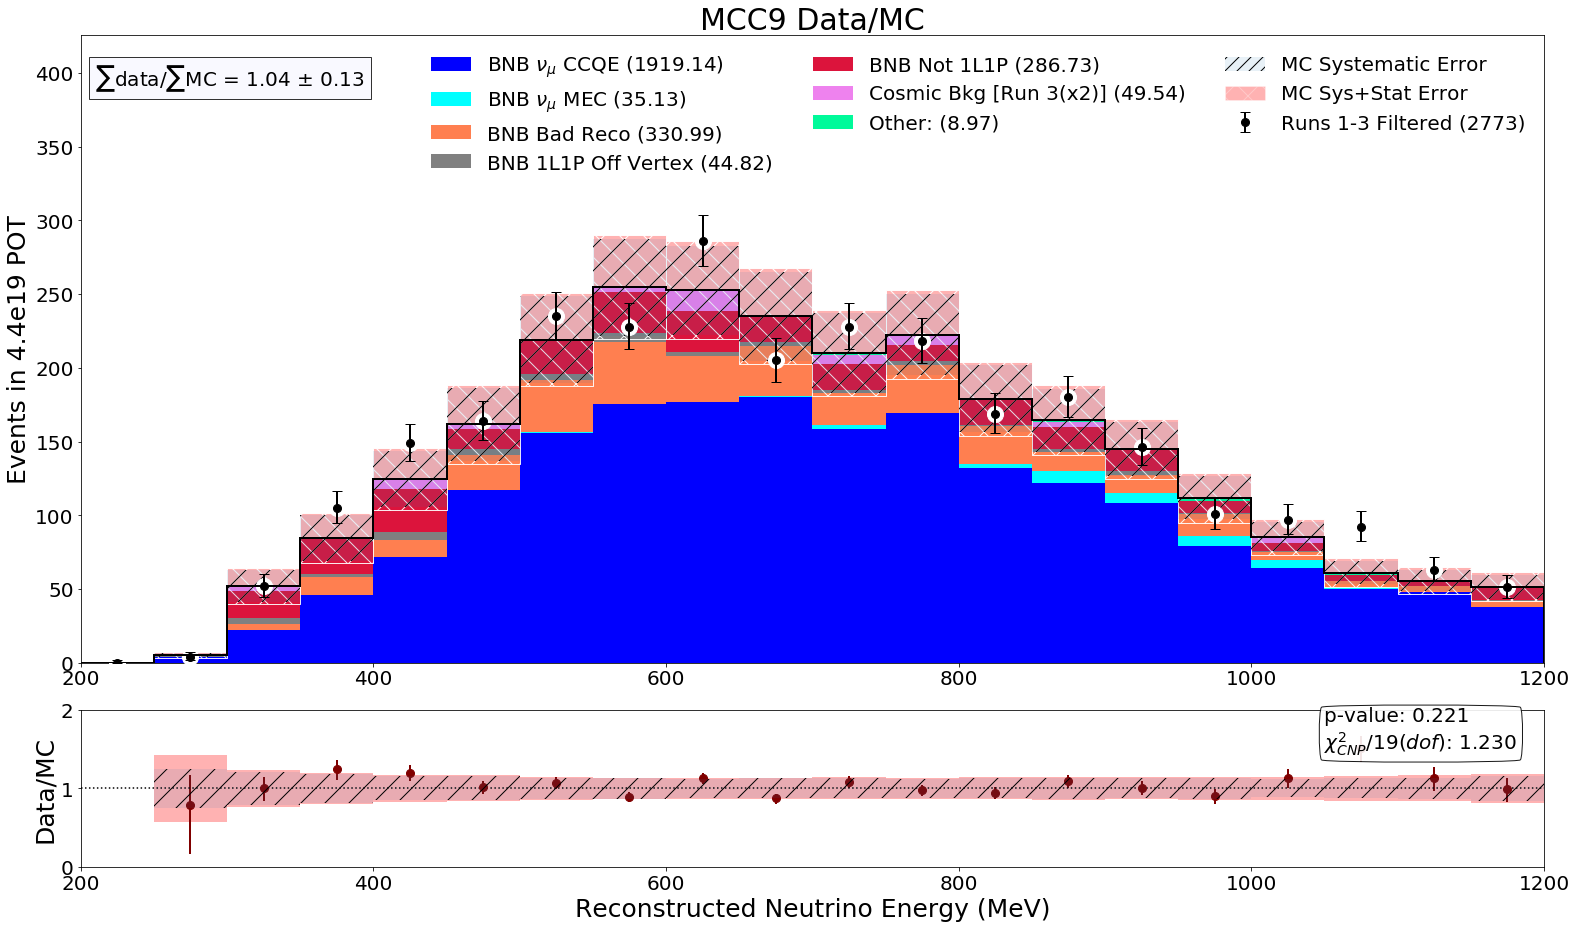

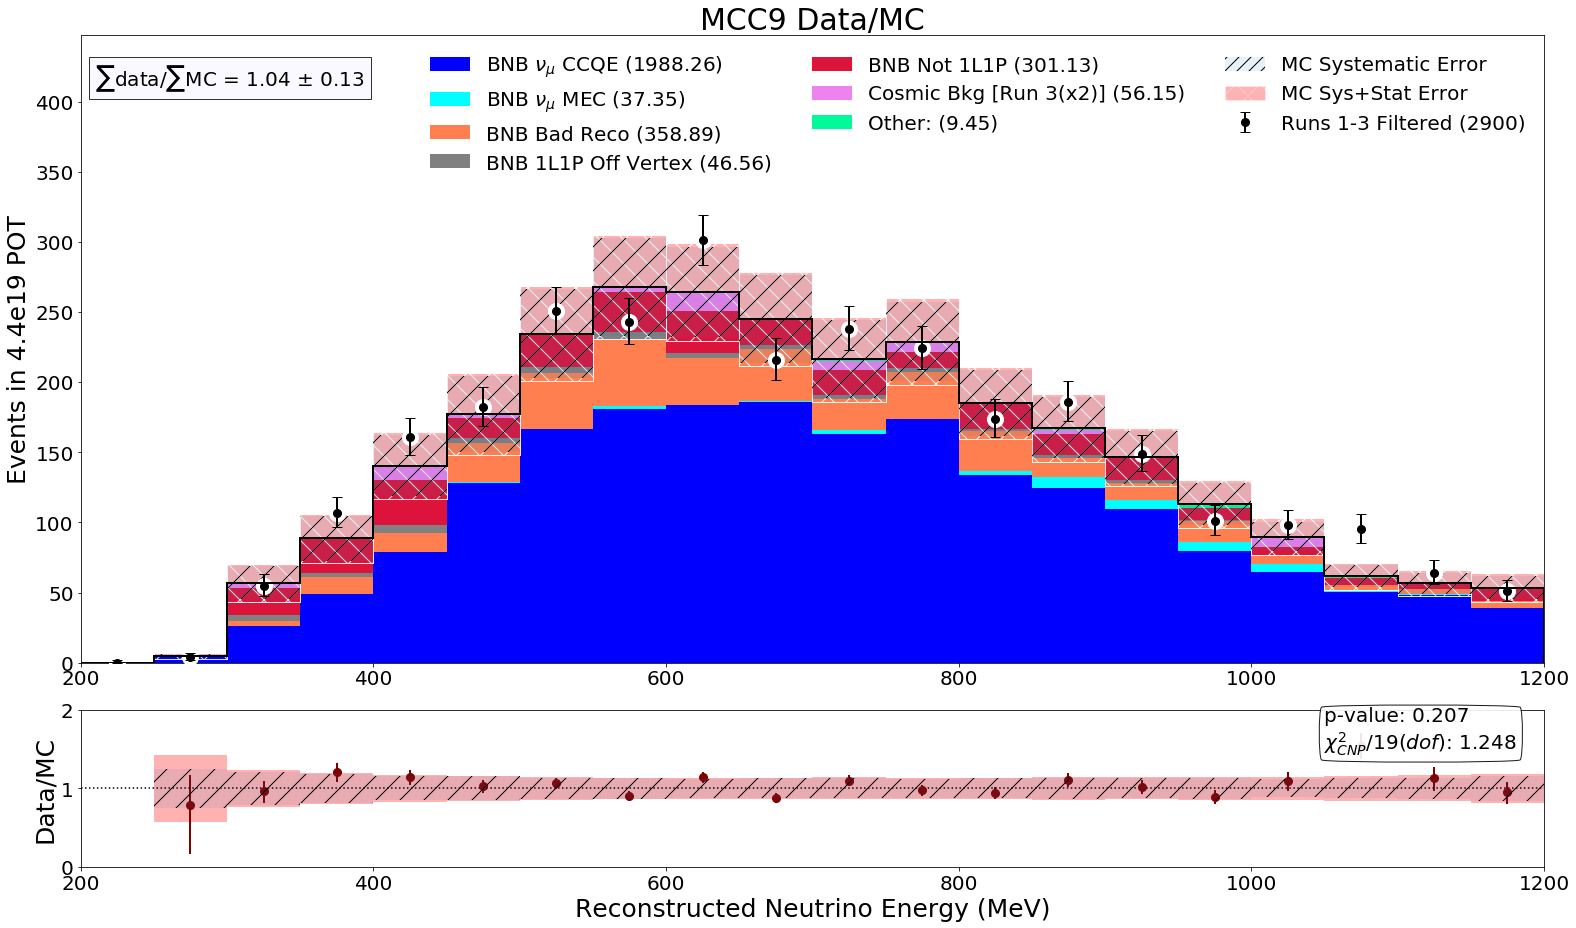

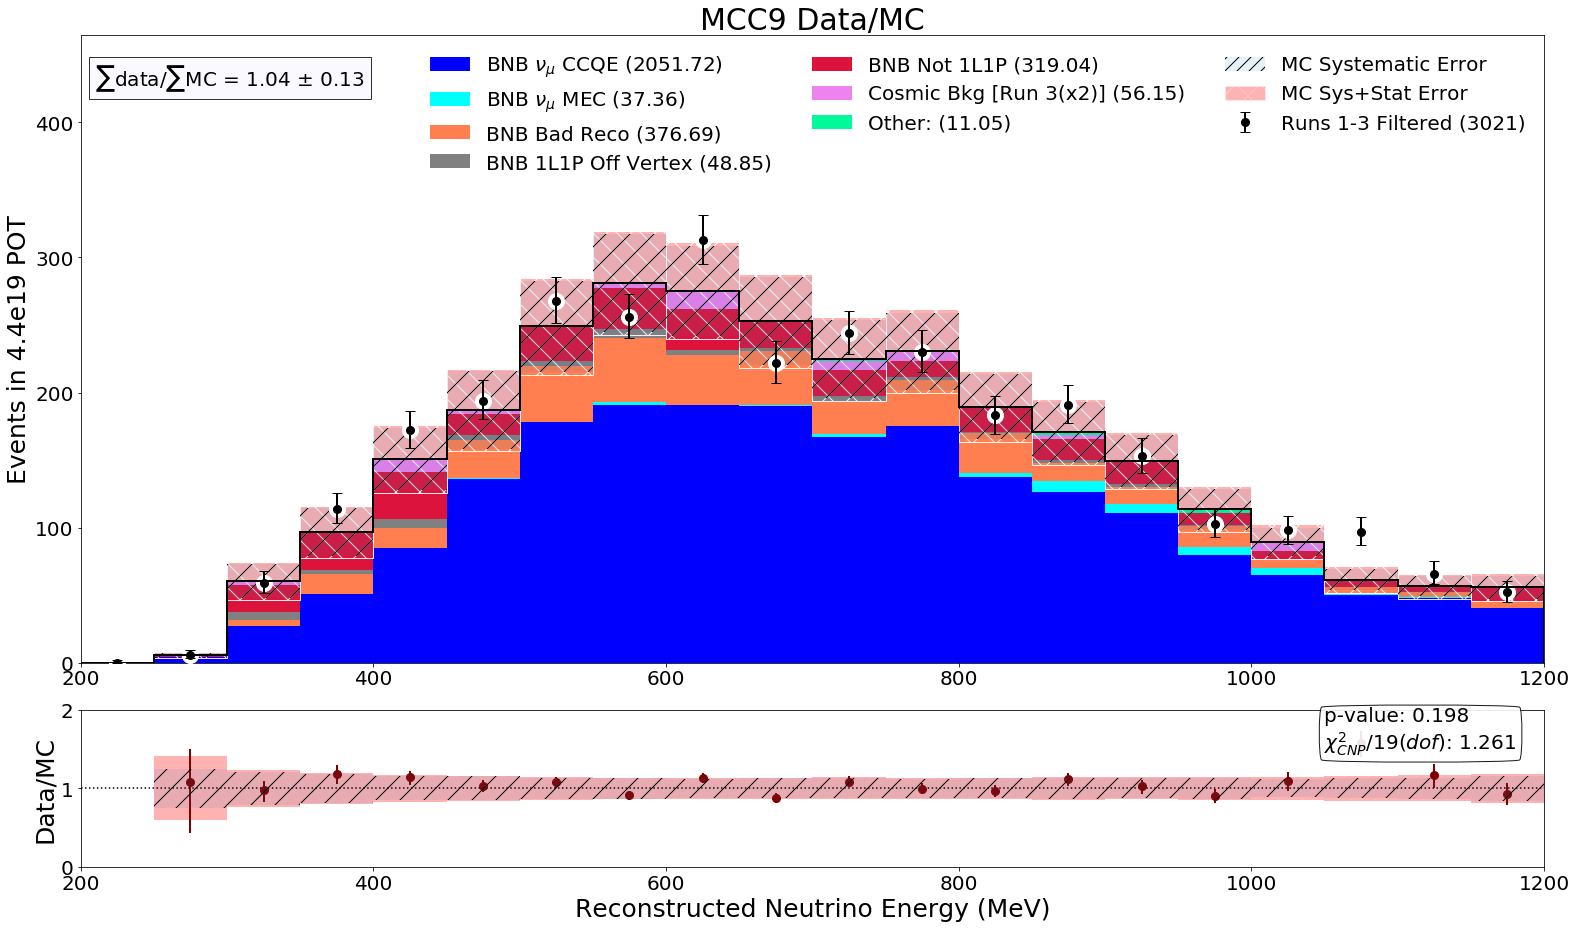

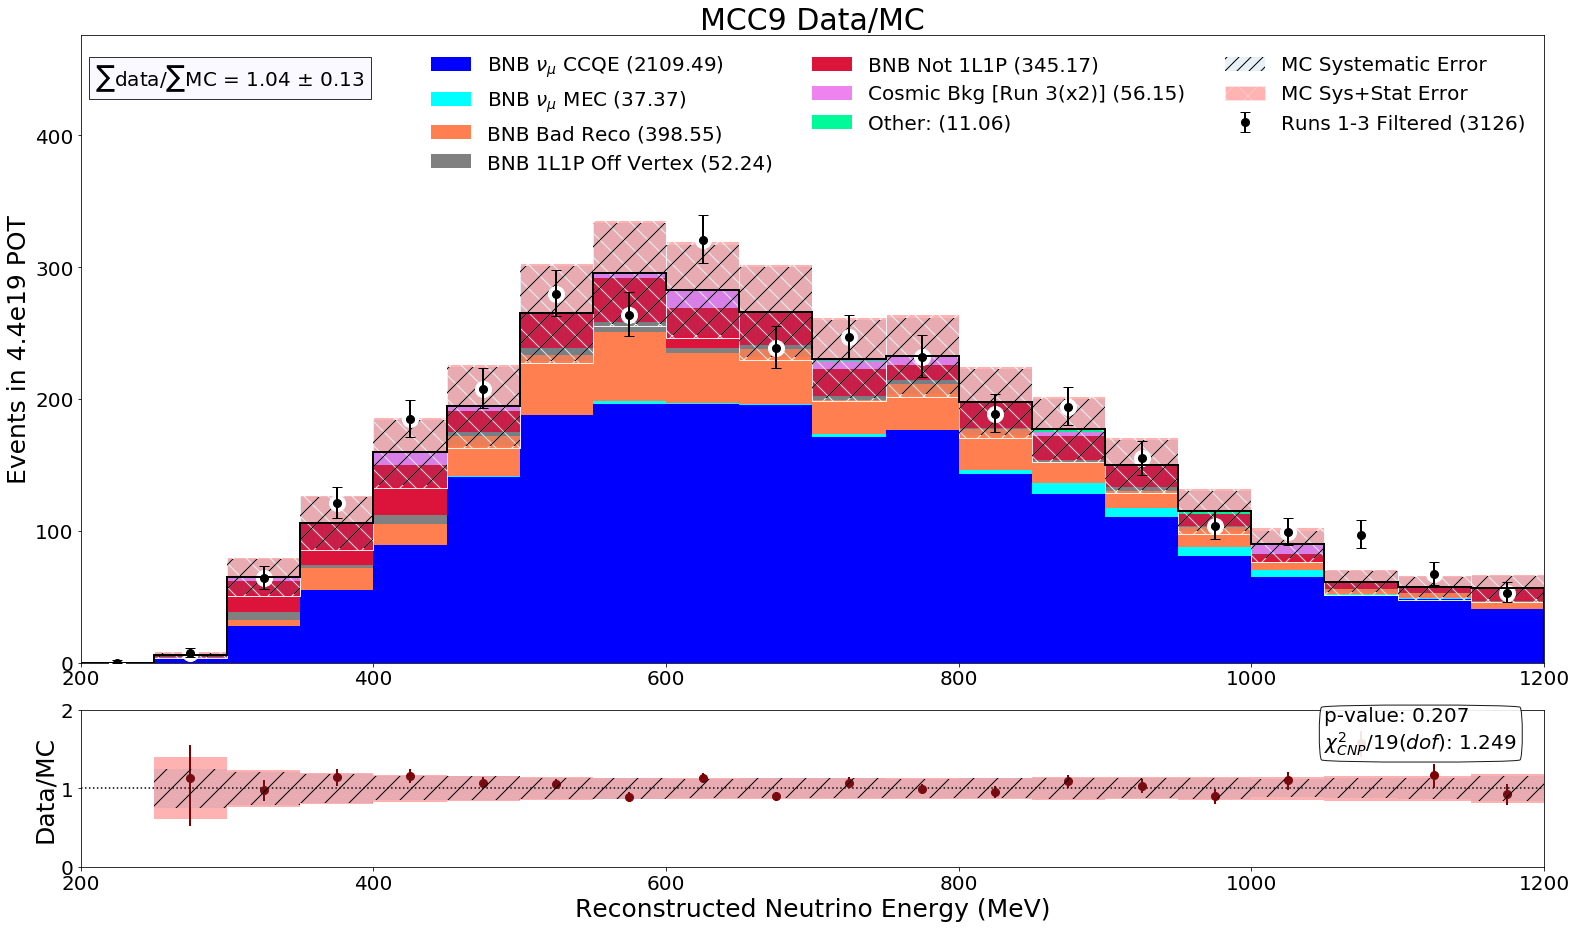

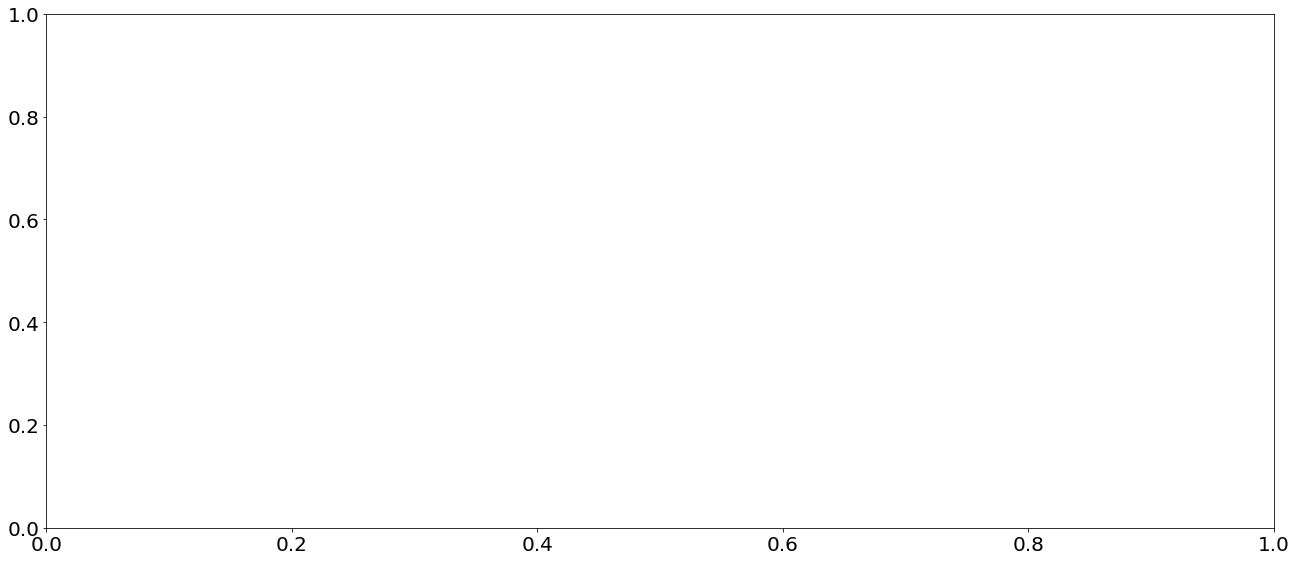

In [12]:
#  weird pval test

nbins = 20
dvar = varListSel['Enu_1m1p']
syscov = np.nan_to_num(np.genfromtxt(dvar.myscov,delimiter=',')) + np.nan_to_num(cov.Polyfit([dvar],[nbins],False))

a_scrs = np.linspace(.2,.6,41)
a_pvals = []

for bcut in a_scrs:
    syscov = np.nan_to_num(np.genfromtxt(dvar.myscov,delimiter=',')) + np.nan_to_num(cov.Polyfit([dvar],[nbins],False))
    bdtcuts = 'bkgBDT_univ < %f'%bcut
    morecuts = 'Proton_CosTheta > 0'
    bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
    s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts
    print(s_cuts)
    bigData.AddCut(s_cuts)
    bigMC.AddCut(s_cuts)
    fig,ax0,ax1,pval = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(22,13),consFac=.01)
    a_pvals.append(pval)

(0, 1)

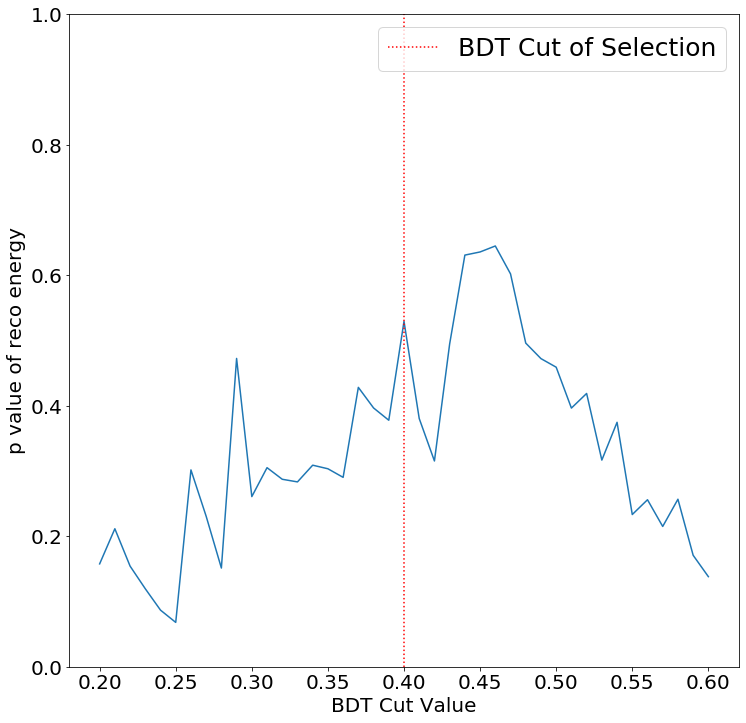

In [112]:
fig,ax = plt.subplots(figsize=(12,12))
ax.plot(a_scrs,a_pvals)
ax.axvline(.4,linestyle=':',color='red',label='BDT Cut of Selection')
ax.set_ylabel('p value of reco energy',fontsize=20)
ax.set_xlabel('BDT Cut Value',fontsize=20)
ax.legend(fontsize=25)
ax.set_ylim(0,1)


Sub  1\% contributions:
['BNB $\\nu_\\mu$ MEC (7.38)', 'BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (4.76)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (2.38)', '$\\nu_e$ Intrinsic (0.19)', 'BNB Other (4.76)', 'Cosmic Background (20.81)']
Normalization Uncertainty: 0.0
1.3403870269293428 0.14572689460986865
Data/MC
[       nan 0.83645684 0.94777952 1.02075675 1.01767846 1.07394847
 0.84995127 1.18394207 1.10674352 1.04088565 1.26451412 1.05230383
 0.97266297 1.18772329 0.97255193 1.23395155 1.54583886 1.13185109
 1.53128057 0.82506993]
[ 225.  275.  325.  375.  425.  475.  525.  575.  625.  675.  725.  775.
  825.  875.  925.  975. 1025. 1075. 1125. 1175.]


Text(0.27, 0.17, 'Genie Tune 2')

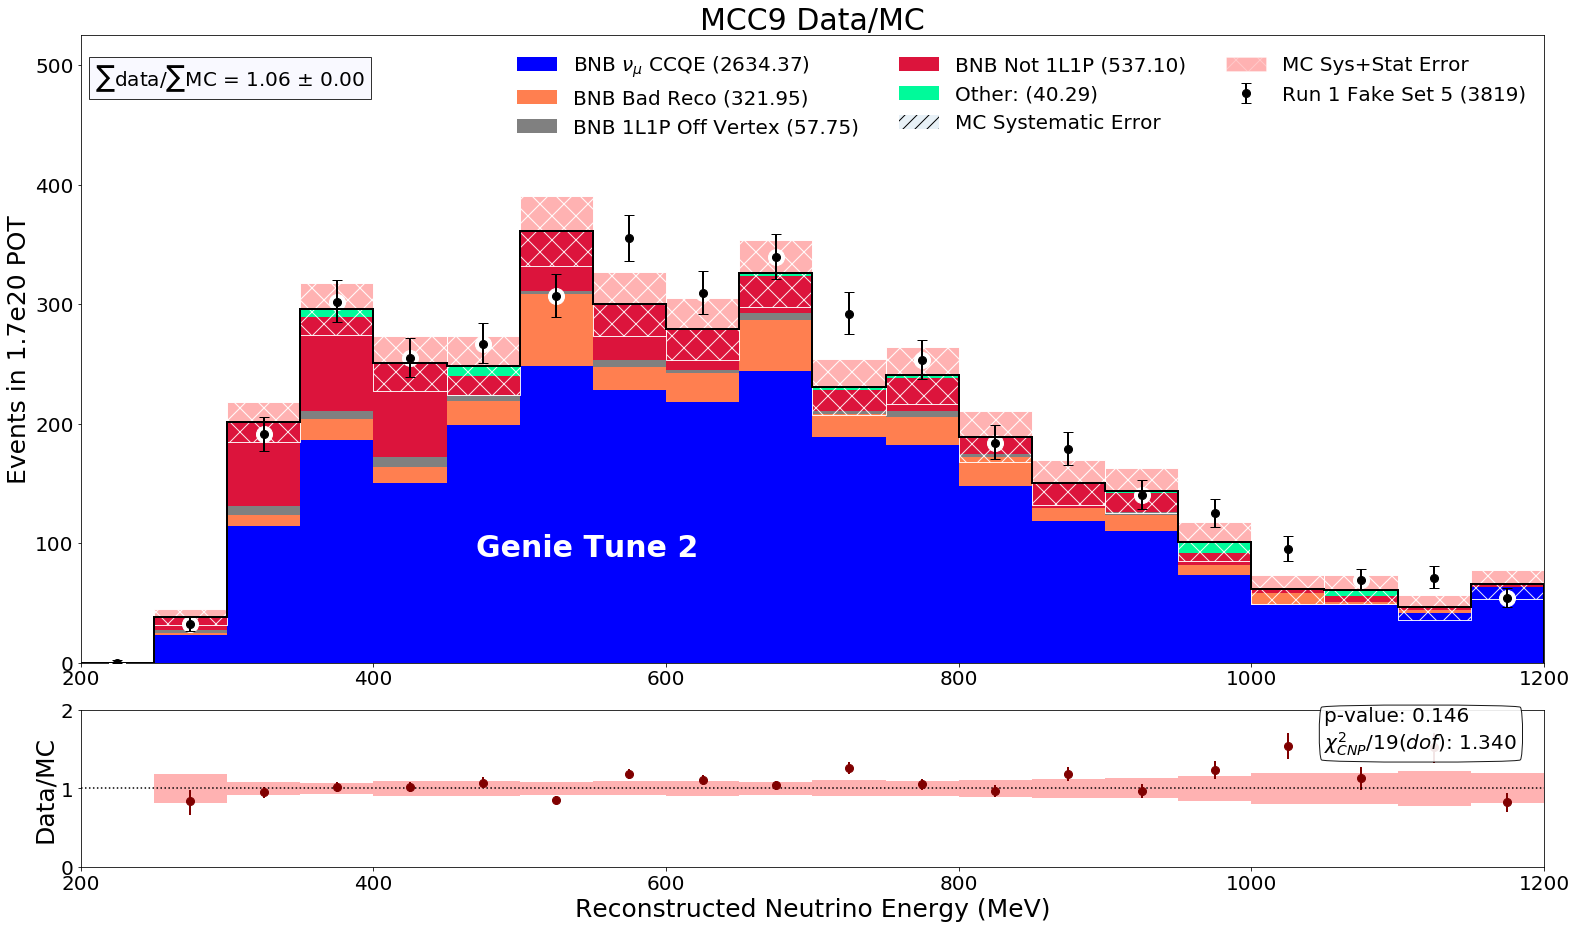

In [23]:
nbins = 20
dvar = varListSel['Enu_1m1p']

syscov = np.zeros((nbins,nbins))    
    
fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,run1Hists,run1FakedataHist_set5,syscov,fs=(22,13),consFac=.01)
#fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(22,13),consFac=.01)

#ax0.set_ylabel('Events in 6.8e20',fontsize=25)
ax0.set_ylabel('Events in 1.7e20 POT',fontsize=25)

#ax0.annotate('DetSys Error Incomplete',xy=(.27,.22), xycoords='axes fraction',fontsize=30,color='white',weight = 'bold')
ax0.annotate('Genie Tune 2',xy=(.27,.17), xycoords='axes fraction',fontsize=30,color='white',weight = 'bold')